# Análise de Dados de Anúncios de Veículos Usados 

Este trabalho visa analisar os dados referentes a anúncios de veículos usados online. 

Autor: Paulo Pinheiro Junqueira

# Tabela de Conteúdo

---


1. [Compreendendo o Problema de Negócios](#negocio) 
2. [Carregando os Dados e Análises Iniciais](#load)
3. [Análise Exploratória dos Dados](#EDA)
4. [Tratamento dos Dados e Correlações](#engineering)
5. [Modelos e Experimentos](#models)
6. [Considerações Finais](#conclusion)


---



---




## Compreendendo o Problema de Negócios <a name="negocio"></a>
Neste problema de negócio, são verificados os dados coletados de anúncios de venda de veículos usados com o objetivo de auxiliar ambos os lados, o anunciante e o compradores. Nestes, são fornecidos os dados principais dos veículos, como: Modelo, Fabricante, Ano e principalmente o Preço desejado.

Inicialmente, busca-se explorar os dados para encontrar uma relação onde seja possível estimar os valores dos veículos apenas pelas caracteristicas principais. Sendo assim, os anunciantes pricisariam apenas complementar alguns dados básicos e teriam sugestões de preço de venda baseado em veículos semelhantes anunciados na plataforma. Acredita-se que uma forte caracteristica para avaliar está na relação da tabela Fipe. Porém, busca-se avaliar o modelo sem essa caracteristca, visando apenas outros veículos semelhantes.

Outro ponto a ser explorado é verificar os modelos, fabricantes e caracteristicas mais anunciadas na plataforma para auxiliar parceiros que compram e revendem veículos. Desda maneira, identificando aqueles veículos mais promissores para manter estocado e até mesmo identificando o preço esperado para relizar ajustes competitivos.




## Carregando o Dataset e Análises Iniciais <a name="load"></a>

Primeiramente, são carregados os modulos utilizados para a analise. Análise realizada no Google Colab em Python.

In [ ]:
#Instalar modulos caso necessário (Google colab )
# !pip install category_encoders
# !pip install geopandas
# !pip install contextily

#Módulos básicos para análises
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
from plotly.subplots import make_subplots

#Carregando modulos para plot de mapas.
import geopandas as gpd
import contextily as ctx

#Carregando módulos de Machine learning
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from category_encoders import OneHotEncoder
from sklearn import tree
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
from sklearn import svm
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import mean_absolute_error, mean_squared_error, explained_variance_score

plt.style.use('seaborn')
%matplotlib inline


O arquivo contendo os dados é carregado utilizando um Dataframe do módulo pandas.

In [ ]:
#Carregando dados em um dataframe do tipo pandas a partir do arquivo "car_data.csv"
f = 'car_data.csv'
data = pd.read_csv(f, delimiter = ',')

In [ ]:
#Avaliando o número de LinhasXColunas
print(f'Este dataset contém: \n{data.shape[0]} Linhas/Amostras \n{data.shape[1]} Colunas/Features ')

Este dataset contém: 
385856 Linhas/Amostras 
13 Colunas/Features 


Analisando a estrutura do dataset.

In [ ]:
#Verificando as primeiras linhas
data.head()

createdat        make    model  ...  engine  bodystyle  fuel
0  2020-10-01T00:04:06Z        Ford       Ka  ...     1.5      Hatch  Flex
1  2020-10-01T00:44:06Z     Hyundai     ix35  ...     2.0        SUV  Flex
2  2020-10-01T01:05:18Z  Volkswagen  Saveiro  ...     1.6    Picapes  Flex
3  2020-10-01T01:05:41Z   Chevrolet   Prisma  ...     1.0      Sedan  Flex
4  2020-10-01T01:08:43Z        Fiat      Uno  ...     1.0      Hatch  Flex

[5 rows x 13 columns]

In [ ]:
#Complementar ao primeiro comando, verificando as ultimas linhas
data.tail()

createdat  make  model  ...  engine  bodystyle  fuel
385851  2020-12-31T21:15:34Z  Fiat  Palio  ...     1.0      Hatch  Flex
385852  2020-12-31T21:17:13Z  Fiat  Palio  ...     1.0      Hatch  Flex
385853  2020-12-31T21:19:15Z  Fiat   Mobi  ...     1.0      Hatch  Flex
385854  2020-12-31T21:21:03Z  Fiat   Mobi  ...     1.0      Hatch  Flex
385855  2020-12-31T21:21:16Z  Fiat   Mobi  ...     1.0      Hatch  Flex

[5 rows x 13 columns]

Imprimindo as primeiras informações do dataset com relação ao número de valores nulos, nomes das colunas e tipos dos dados. Interessante para uma visão generalista dos dados e para identificar  a presença de dados nulos/nan.

In [ ]:
#Primeiras Informações com relação a valores nulos, tipos dos dados.  
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 385856 entries, 0 to 385855
Data columns (total 13 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   createdat   385856 non-null  object 
 1   make        385856 non-null  object 
 2   model       385856 non-null  object 
 3   modelyear   385856 non-null  int64  
 4   fipe_price  363229 non-null  float64
 5   price       385620 non-null  float64
 6   km          383192 non-null  float64
 7   region      385856 non-null  object 
 8   phonearea   385856 non-null  int64  
 9   color       385856 non-null  object 
 10  engine      378915 non-null  object 
 11  bodystyle   385856 non-null  object 
 12  fuel        385856 non-null  object 
dtypes: float64(3), int64(2), object(8)
memory usage: 38.3+ MB


Complementando os resultados anteriores. Pode-se verificar mais claramente o número de dados faltantes em cada feature.

In [ ]:
#verificar os dados nan/nulos
data.isnull().sum()

createdat         0
make              0
model             0
modelyear         0
fipe_price    22627
price           236
km             2664
region            0
phonearea         0
color             0
engine         6941
bodystyle         0
fuel              0
dtype: int64

Como observado no célula acima, há valores faltantes no dateset. Um forma visual e interessante de verificar a proporção desses dados faltantes com relação ao todo é através de um mapa de calor (heatmap). Neste, os valores nulos são linhas pretas; 
 
Interessante notar um maior número de dados faltantes nas caracteristicas:'fipe_price' e 'engine'. Seguidas por 'km'.

Text(0.5, 1.0, 'Heatmap para Análise de Dados Nulos')

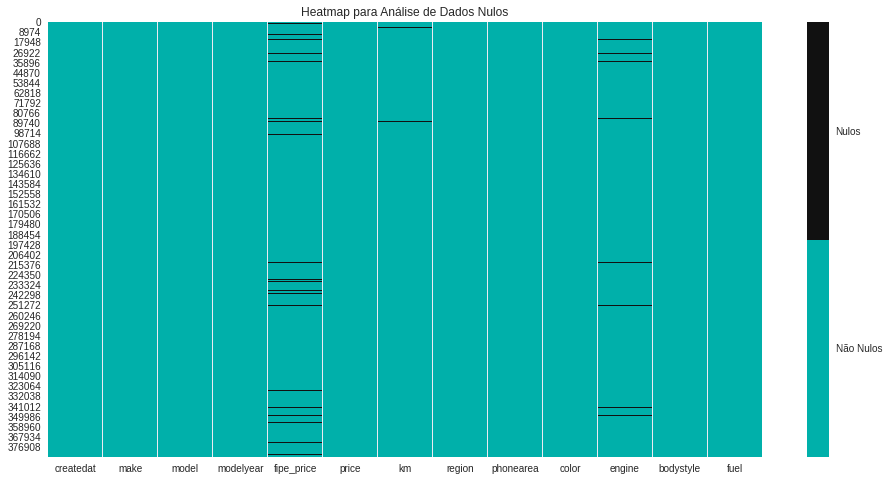

In [ ]:
#Plot do heatmap e as configurações do gráfico
plt.figure(figsize = (16,8))
ax = sns.heatmap(data.isnull(), cmap = ['#00B0AA','#111111'])
cbar = ax.collections[0].colorbar
cbar.set_ticks([0.25,0.75])
cbar.set_ticklabels(['Não Nulos','Nulos'])
plt.title('Heatmap para Análise de Dados Nulos')

Verificando os valores únicos de cada feature. Tem-se, por exemplo,  57 fabricantes diferentes e um total de 657 modelos de carros. Interessante já verificar a quantidade de categorias dos valores categóricos.

In [ ]:
#Número de valores únicos em cada feature
data.nunique(axis = 0)

createdat     351748
make              57
model            657
modelyear         65
fipe_price     13578
price          12549
km             64305
region            27
phonearea         65
color             18
engine           208
bodystyle         10
fuel               3
dtype: int64

Na sequência é feita uma análise estatística decritiva dos dados. 

In [ ]:
#Análise descritiva dos valores numéricos
data.describe()

modelyear    fipe_price         price            km      phonearea
count  385856.000000  3.632290e+05  3.856200e+05  3.831920e+05  385856.000000
mean     2016.182680  5.360196e+04  6.040425e+04  9.287483e+12      30.571379
std        10.882551  3.979747e+04  1.811296e+06  3.119260e+15      21.814351
min         0.000000  5.107000e+03  0.000000e+00  0.000000e+00      11.000000
25%      2014.000000  3.437000e+04  3.490000e+04  2.835200e+04      11.000000
50%      2017.000000  4.278600e+04  4.498000e+04  4.761400e+04      21.000000
75%      2019.000000  6.245600e+04  6.599000e+04  8.334900e+04      43.000000
max      2021.000000  2.785120e+06  1.111111e+09  1.111111e+18      99.000000

1) Inicialmente, pode-se perceber que 'modelyear' possui valores iguais a zero. Desta forma, suspeita-se que há dados faltantes também nesta feature, já que não deveria existir o ano do modelo do carro como zero. Na feature 'price', há algo semelhante.  
2) Há também valores bem extremos nos dados, possíveis outliers?  

Na sequência são verificados dados duplicados no dataset e removendo caso encontrado algum.

In [ ]:
#Verificando dados duplicados.
duplicados = data.duplicated().sum()
print(f'Número de valores duplicados: {duplicados}')

Número de valores duplicados: 7634


In [ ]:
#removendo os valores duplicados, porém mantendo a primeira entrada de cada dado
data = data.drop_duplicates(keep='first')

Ao final desta verificação inicial, pode-se levantar algumas perguntas e ideais que auxiliam a resulução do problemas:
1. Há outliers em muitas features, investigar.
2. Valores nulos presentes e o que seriam os valores não nulos mas com valor numérico igual a zero?
3. Como estão as proporções das variáveis categóricas? Desbalanceadas?
4. Quais variáveis melhor se relacionam com a target?
5. Fipe price deve ser um feature que se relaciona positivamente com price
6. Muitas categorias para color e engine. São relevantes?


---




## Análise Exploratória dos Dados<a name="EDA"></a>

Após uma primeira análise, é realizada uma análise mais profunda buscando responder e focar nas perguntas anteirores e verificar as relações entre os dados. Etapa para verificar quais features melhor se relacionam com a feature price (target para esse projeto). Além também de investigar possíveis novas abordagem para trabalhos futuros.

Inicialmente, as features são verificadas de forma individual, e posteriormente, as correlações.

### Análise feature 'createdat'

In [ ]:
#Convertendo para o tipo datetime do pandas
data['createdat'] = pd.to_datetime(data['createdat'])

In [ ]:
 #Extraindo o ano e o mês das publicações dos anúncios
 data['create_m'] = data['createdat'].map(lambda x: x.month)
 data['create_y'] = data['createdat'].map(lambda x: x.year)

In [ ]:
data.head()

createdat        make    model  ...  fuel  create_m  create_y
0 2020-10-01 00:04:06+00:00        Ford       Ka  ...  Flex        10      2020
1 2020-10-01 00:44:06+00:00     Hyundai     ix35  ...  Flex        10      2020
2 2020-10-01 01:05:18+00:00  Volkswagen  Saveiro  ...  Flex        10      2020
3 2020-10-01 01:05:41+00:00   Chevrolet   Prisma  ...  Flex        10      2020
4 2020-10-01 01:08:43+00:00        Fiat      Uno  ...  Flex        10      2020

[5 rows x 15 columns]

In [ ]:
#verificando o range 
data[['create_m', 'create_y']].describe()

create_m  create_y
count  378222.000000  378222.0
mean       10.981569    2020.0
std         0.812854       0.0
min        10.000000    2020.0
25%        10.000000    2020.0
50%        11.000000    2020.0
75%        12.000000    2020.0
max        12.000000    2020.0

In [ ]:
map_m ={10:'Outubro', 11:'Novembro', 12:'Dezembro'}
data= data.replace({'create_m':map_m})

In [ ]:
#Contagem de valores em cada um dos 3 meses estudados
data['create_m'].value_counts()

Outubro     128501
Novembro    128191
Dezembro    121530
Name: create_m, dtype: int64

Os dados fazem referência aos últimos 3 meses do ano de 2020. São dados balanceados entre os meses. Calculando o preço médio por mês e comparando com dados filtrados e valor Fipe tabelado médi.

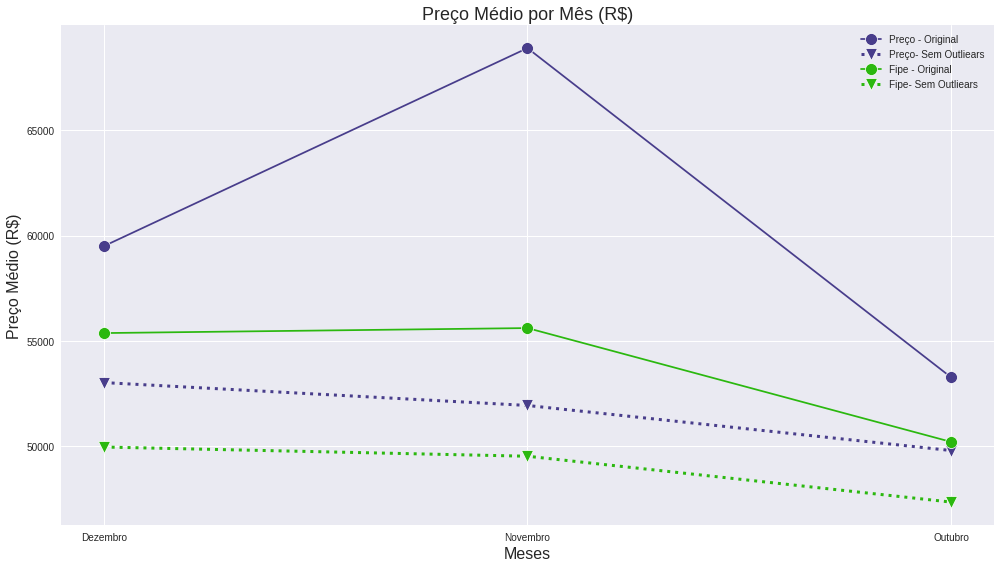

In [ ]:
#Calculando o preço médio por categoria e plotando
plt.figure(figsize= (14,8))
var = 'create_m'
order = ['Outubro','Novembro','Dezembro']


sns.lineplot(x = var, y = 'price',
                data = data.groupby(var, as_index = False)['price'].mean(),marker='o', markersize = 12,color = '#483D8B')

sns.lineplot(x = var, y = 'price',
                  data = data[(data['price']>=5e3) & (data['price']<=1.5e5) & (data['fipe_price']<=1.5e5)].groupby(var, as_index = False)['price'].mean(),
                  marker='v',markersize = 12,color = '#483D8B', linestyle = ':', linewidth = 3)


sns.lineplot(x = var, y = 'fipe_price',
                data = data.groupby(var, as_index = False)['fipe_price'].mean(),marker='o', markersize = 12,color = "#2BB80F")

sns.lineplot(x = var, y = 'fipe_price',
                  data = data[(data['price']>=5e3) & (data['price']<=1.5e5) & (data['fipe_price']<=1.5e5)].groupby(var, as_index = False)['fipe_price'].mean(),
                  marker='v',markersize = 12, color = "#2BB80F", linestyle = ':', linewidth = 3)



plt.xlabel('Meses',fontdict = {'fontsize':16})
plt.ylabel('Preço Médio (R$)',fontdict = {'fontsize':16})
plt.title('Preço Médio por Mês (R$)', fontdict = {'fontsize':18} )
plt.legend(labels=['Preço - Original','Preço- Sem Outliears','Fipe - Original','Fipe- Sem Outliears'])

plt.tight_layout()

### Análise da feature 'make'

In [ ]:
#Nome das fabricantes presentes no dataset
data['make'].unique()

array(['Ford', 'Hyundai', 'Volkswagen', 'Chevrolet', 'Fiat', 'Renault',
       'Peugeot', 'Citroën', 'Kia', 'Honda', 'Jeep', 'Toyota', 'Nissan',
       'Mitsubishi', 'Volvo', 'Chrysler', 'CAOA Chery', 'BMW', 'Audi',
       'Mercedes-Benz', 'Dodge', 'Land Rover', 'Jac', 'Lifan', 'MG',
       'MINI', 'Porsche', 'Suzuki', 'SsangYong', 'Jaguar', 'Subaru',
       'Troller', 'Lexus', 'Ferrari', 'Geely', 'Cadillac', 'DS', 'Iveco',
       'Buggy BRM', 'Smart', 'Hafei Towner', 'Maserati', 'Yamaha',
       'Mahindra', 'Lincoln', 'GMC', 'Bentley', 'Jin Bei', 'Infiniti',
       'Asia', 'Lamborghini', 'Hummer', 'Effa', 'McLaren', 'CN Auto',
       'Rely', 'Tac'], dtype=object)

In [ ]:
#Contagem de Anúncios por fabricante, ordenado por fabricante com mais anúncios
data['make'].value_counts()

Chevrolet        61619
Fiat             47975
Volkswagen       47403
Renault          36845
Ford             36725
Hyundai          32902
Honda            19510
Toyota           17543
Nissan           13604
Jeep             12691
Citroën          10642
Peugeot          10317
Mitsubishi        5326
Kia               4208
BMW               3628
Audi              3146
Mercedes-Benz     2654
Land Rover        2554
Jac               2446
CAOA Chery        1627
Volvo             1246
Suzuki             655
Porsche            554
Dodge              528
MINI               413
Jaguar             318
Chrysler           196
Lifan              193
Subaru             150
Lexus              142
Troller            128
SsangYong           69
Jin Bei             48
Smart               29
Ferrari             24
Buggy BRM           19
Cadillac            19
Geely               17
Iveco               14
Maserati            14
Yamaha              11
DS                  11
Bentley              9
Infiniti   

In [ ]:
#Identificando as 3 e 15 mais fabricantes e calculando o a porcentagem correspondente 
maisAnuncios15 = sum(data['make'].value_counts()[:15])*100/data.shape[0]
top3 = []
for i in range(3):
    top3.append(sum(data['make'].value_counts()[i:(i+1)])*100/data.shape[0])
print(f'As 15 fabricantes com mais anúncios correspondem a: {maisAnuncios15:.2f}% do total.')

As 15 fabricantes com mais anúncios correspondem a: 95.43% do total.


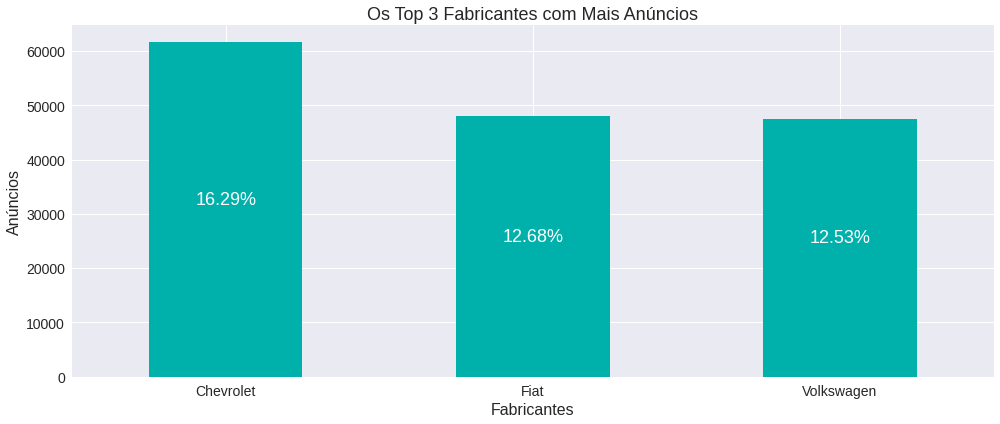

In [ ]:
#Gráfico corresponte as 3 fabricantes com mais anúncios
plt.figure(figsize=(14,6))
ax = data['make'].value_counts()[:3].plot.bar(rot = 0,color ='#00B0AA',fontsize=14)
for i, p in enumerate(ax.patches):
    ax.annotate("{:.2f}%".format(top3[i]) , (p.get_x() + p.get_width() / 2.,
                                          p.get_height()*0.5), ha='center', 
                                          va='center', xytext=(0, 10), 
                                          textcoords='offset points',
                                           color = 'white', size = 18)
plt.xlabel('Fabricantes',fontdict = {'fontsize':16})
plt.ylabel('Anúncios',fontdict = {'fontsize':16})
plt.title('Os Top 3 Fabricantes com Mais Anúncios', fontdict = {'fontsize':18} )
plt.tight_layout()

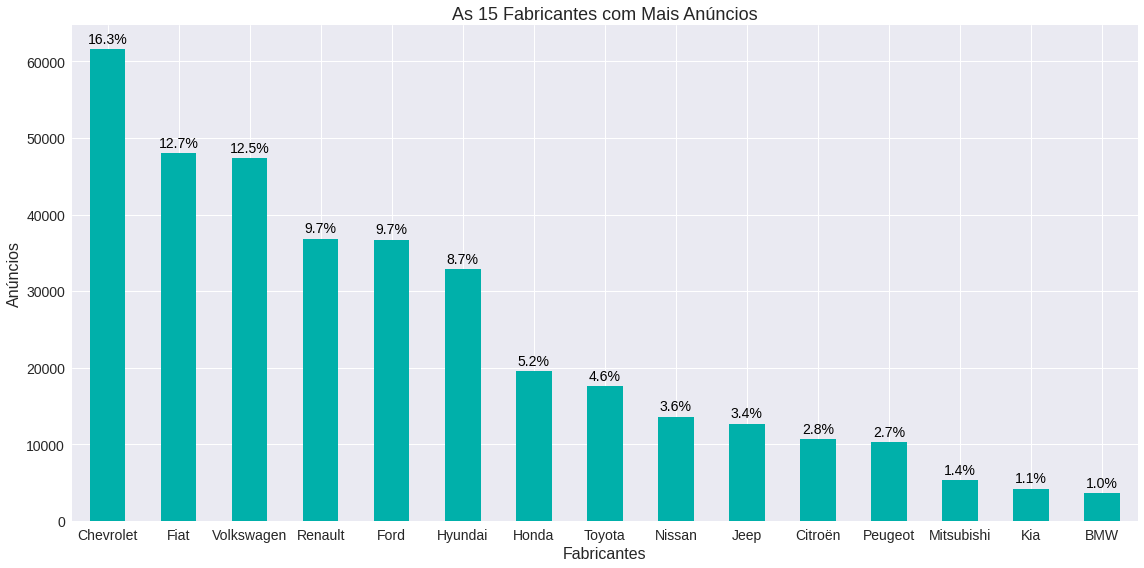

In [ ]:
#Gráfico com as 15 fabricantes com mais anúncios, ordenado.
plt.figure(figsize=(16,8))
ax = data['make'].value_counts()[:15].plot.bar(rot = 0,color ='#00B0AA',fontsize=14)
for p in ax.patches:
    ax.annotate("{:.1f}%".format(p.get_height()*100/data.shape[0]), (p.get_x() + p.get_width() / 2.,
                                          p.get_height()), ha='center', 
                                          va='center', xytext=(0, 10), 
                                          textcoords='offset points',       
                                           color = 'black', size = 14)
plt.xlabel('Fabricantes',fontdict = {'fontsize':16})
plt.ylabel('Anúncios',fontdict = {'fontsize':16})
plt.title('As 15 Fabricantes com Mais Anúncios', fontdict = {'fontsize':18} )
plt.tight_layout()


In [ ]:
#Identificando a porcentagem dos anúncios das outras fabricantes com relação ao total.
menosAnuncios15 = sum(data['make'].value_counts()[-15:])*100/data.shape[0]
outras = sum(data['make'].value_counts()[15:])*100/data.shape[0]
print(f'As outras fabricantes correspondem a: {outras:.2f}% do total \nAs 15 fabricantes com menos anúncios correspondem a: {menosAnuncios15:.2f}% do total')

As outras fabricantes correspondem a: 4.57% do total 
As 15 fabricantes com menos anúncios correspondem a: 0.02% do total


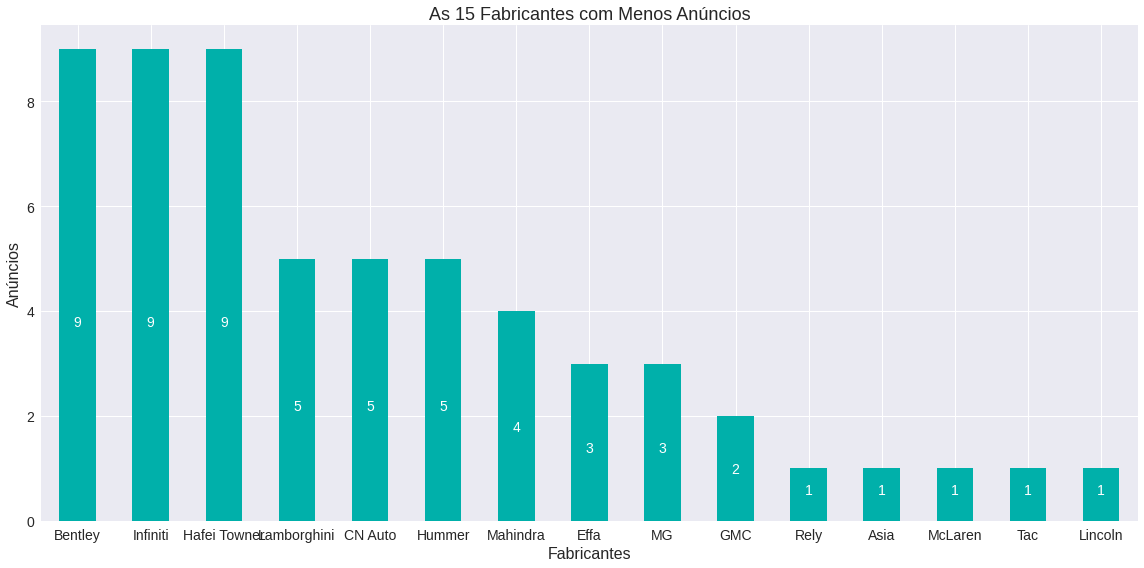

In [ ]:
#Gráfico com as 15 fabricantes com menos anúncios
plt.figure(figsize=(16,8))
ax = data['make'].value_counts()[-15:].plot.bar(rot = 0,color ='#00B0AA',fontsize=14)
for p in ax.patches:
    ax.annotate("{}".format(p.get_height()), (p.get_x() + p.get_width() / 2.,
                                          p.get_height()*0.4), ha='center', 
                                          va='center', xytext=(0, 10), 
                                          textcoords='offset points',
                                           color = 'white', size = 14)
plt.xlabel('Fabricantes',fontdict = {'fontsize':16})
plt.ylabel('Anúncios',fontdict = {'fontsize':16})
plt.title('As 15 Fabricantes com Menos Anúncios', fontdict = {'fontsize':18} )
plt.tight_layout()

### Análise da feature 'model'

In [ ]:
#Número de modelos únicos anúnciados
modelos = data['model'].nunique()
print(f'Total de modelos anunciados: {modelos}')

Total de modelos anunciados: 657


In [ ]:
#Identificando os 10 modelos com mais anúncios e o total correspondente
maisModelosAnuncios10 = sum(data['model'].value_counts()[:10])*100/data.shape[0]
print(f'Os 10 modelos com mais anúncios correspondem a: {maisModelosAnuncios10:.2f}% do total.')

Os 10 modelos com mais anúncios correspondem a: 27.64% do total.


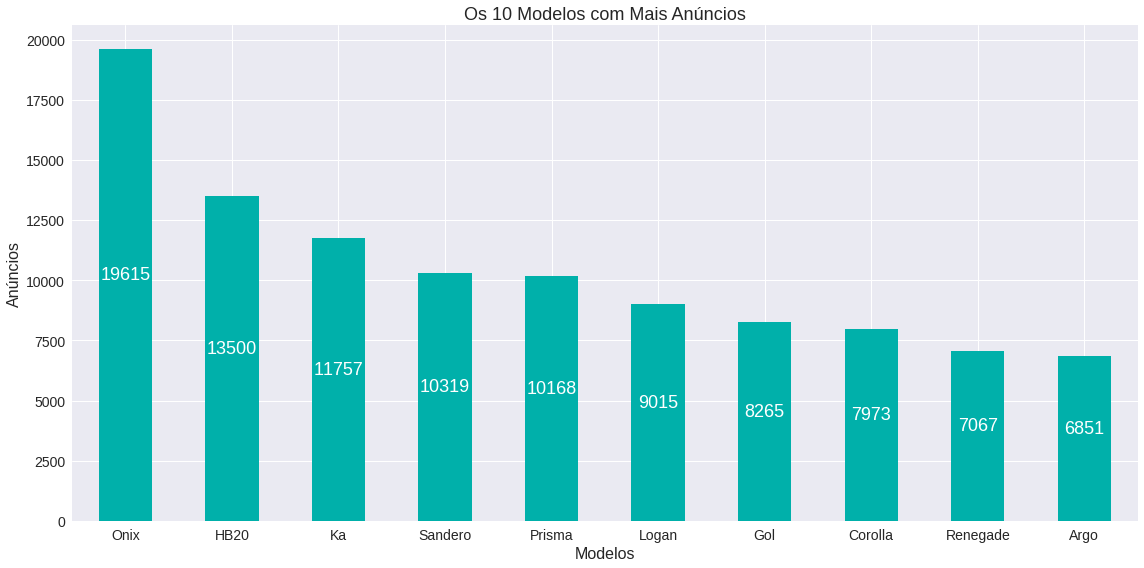

In [ ]:
#Gráfico com os 10 modelos com mais anúncios
plt.figure(figsize=(16,8))
ax = data['model'].value_counts()[:10].plot.bar(rot = 0,color ='#00B0AA',fontsize=14)
for p in ax.patches:
    ax.annotate("%i" % p.get_height(), (p.get_x() + p.get_width() / 2.,
                                          p.get_height()*0.5), ha='center', 
                                          va='center', xytext=(0, 10), 
                                          textcoords='offset points',
                                           color = 'white', size = 18)

plt.xlabel('Modelos',fontdict = {'fontsize':16})
plt.ylabel('Anúncios',fontdict = {'fontsize':16})
plt.title('Os 10 Modelos com Mais Anúncios', fontdict = {'fontsize':18} )
plt.tight_layout()

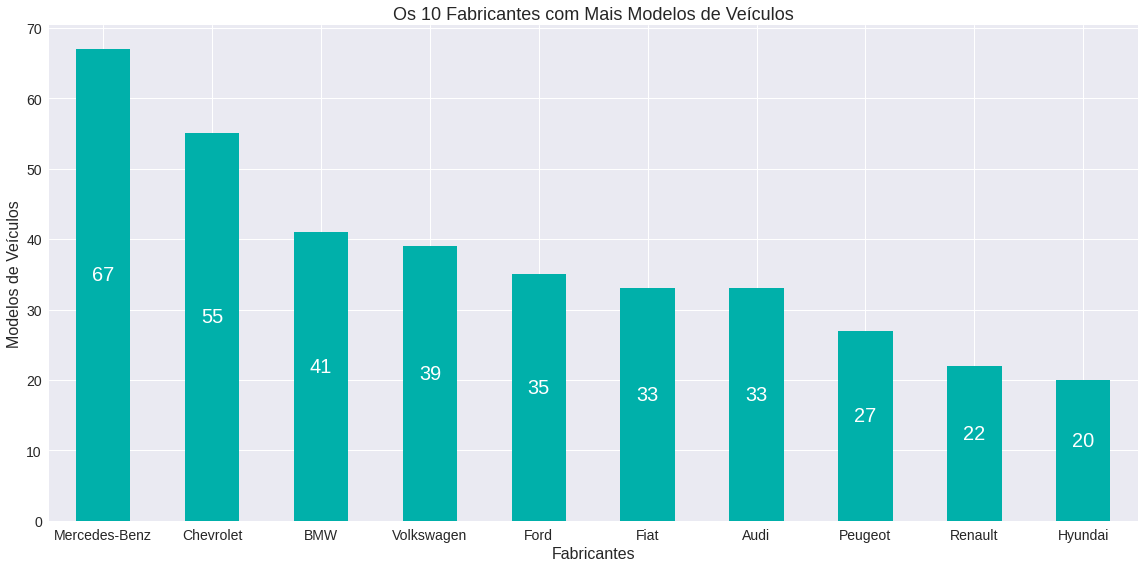

In [ ]:
#Gráfico com os 10 fabricantes com mais modelos únicos
plt.figure(figsize = (16,8))
ax = data.groupby('make')['model'].nunique().sort_values(ascending = False)[:10].plot.bar(rot = 0,color ='#00B0AA',fontsize=14)
for p in ax.patches:
    ax.annotate("%i" % p.get_height(), (p.get_x() + p.get_width() / 2.,
                                          p.get_height()*0.5), ha='center', 
                                          va='center', xytext=(0, 10), 
                                          textcoords='offset points',
                                           color = 'white', size = 20)
    
plt.xlabel('Fabricantes',fontdict = {'fontsize':16})
plt.ylabel('Modelos de Veículos',fontdict = {'fontsize':16})
plt.title('Os 10 Fabricantes com Mais Modelos de Veículos', fontdict = {'fontsize':18} )
plt.tight_layout()

Comparando as dez frabicantes com mais modelos de veículos anunciados, Mercedes-Benz e Chevrolet com relação ao número de veículos anunciados. É observado uma grande diferença: A Chevrolet, apesar de ter um número grande de modelos, fica atrás da Mercedes-Bens, porém em números de anúncios, domina.

In [ ]:
mb_most = data[data['make']== 'Mercedes-Benz']['model'].value_counts()[0]
ch_most = data[data['make']== 'Chevrolet']['model'].value_counts()[0]
print(f'Mercedes-Benz:{mb_most} \nChevrolet: {ch_most}')

Mercedes-Benz:727 
Chevrolet: 19615


### Análise da feature 'modelyear'

Investigando os anos dos modelos cadastrados, nota-se dois padrões diferentes.

In [ ]:
data['modelyear'].unique()

array([2019, 2014, 2013, 2015, 2010, 2003, 2020, 2017, 2018, 2016, 2008,
       2009, 2011, 2012, 2021, 2007, 1972, 2004, 2006, 2005, 2001, 1999,
       2002, 1979, 2000, 1997, 1995, 1998, 1993, 1996, 1991, 1994, 1975,
       1971, 1963, 1966, 1977, 1976, 1978, 1992, 1980,    0, 1989, 1988,
       1990, 1984, 1981, 1982, 1973, 1983, 1965, 1974, 1951, 1987, 1959,
       1969, 1986,    7,   18,   10,   11,   15,   12, 1970, 1962])

Verificando o número de amostras que estão no padrão diferente da maioria, percebe-se que são poucas entradas e muitas contém dados faltantes.No caso dos valores diferentes de 0, poderiam ser convertidas para o  formato 'yyyy', assumindo que estão no formato 'yy', porém há outros dados faltantes nestas amostras. Semelhante, para o valor '0', fica difícil inferir o valor, já que dependeria do anúnciante. Para melhorar a exploração de dados, opta-se por remove-las nesta etapa.

In [ ]:
#Analisando as amostras que possuem modelyear no padrão minoritária observado:
data.query('modelyear >=0 and modelyear <=18')

createdat        make  ...  create_m  create_y
47351  2020-10-13 12:51:38+00:00      Toyota  ...   Outubro      2020
69557  2020-10-17 13:25:21+00:00  Volkswagen  ...   Outubro      2020
79556  2020-10-19 18:01:20+00:00     Peugeot  ...   Outubro      2020
334748 2020-12-14 15:57:25+00:00  Volkswagen  ...  Dezembro      2020
334751 2020-12-14 15:57:29+00:00   Chevrolet  ...  Dezembro      2020
334775 2020-12-14 15:57:57+00:00      Nissan  ...  Dezembro      2020
334777 2020-12-14 15:57:59+00:00        Fiat  ...  Dezembro      2020
334792 2020-12-14 15:58:16+00:00     Peugeot  ...  Dezembro      2020
334799 2020-12-14 15:58:24+00:00        Fiat  ...  Dezembro      2020
334803 2020-12-14 15:58:28+00:00  Mitsubishi  ...  Dezembro      2020

[10 rows x 15 columns]

In [ ]:
#removendo as amostras nas condições acima:
data = data.drop(data.query('modelyear >=0 and modelyear <=18').index) 

Verifica-se que a maioria dos carros anunciados está dentro da faixa 2014-2021. o Carro mais antigo anúnciado é de 1951.

In [ ]:
 #Descrição dos dados modelyear
 modelyear_stats = data['modelyear'].describe()
 print(modelyear_stats)

count    378212.000000
mean       2016.174690
std           3.755801
min        1951.000000
25%        2014.000000
50%        2017.000000
75%        2019.000000
max        2021.000000
Name: modelyear, dtype: float64


Analisando o modelo de ano 1951, tem-se que é um veículo da fabricante Ford modelo F1. Há quatro registros, sendo dois deles muito semelhantes, onde varia apenas a data de publicação. Nota-se diferença de minutos nas publicaçõe, sugerindo de fato registros duplicados. Essas dados não apresentam valores da tabela Fipe e uma hipótese inicial é da possibilidade de não haver esses dados disponíveis, já que tabela fipe foi criada criada em meados dos anos 1973.

In [ ]:
#Analisando modelos com ano = 1951
data[data['modelyear'] == 1951]

createdat  make model  ...      fuel  create_m  create_y
214029 2020-11-17 22:15:24+00:00  Ford   F-1  ...  Gasolina  Novembro      2020
288914 2020-12-06 05:23:03+00:00  Ford   F-1  ...  Gasolina  Dezembro      2020
325389 2020-12-12 05:50:51+00:00  Ford   F-1  ...  Gasolina  Dezembro      2020
325419 2020-12-12 05:54:01+00:00  Ford   F-1  ...  Gasolina  Dezembro      2020

[4 rows x 15 columns]

Através da análise do ano de modelo dos veículos anunciados, notou-se que modelos antigos, com ano inferior a 1991, não possuem o valor da tabela Fipe. Uma pesquisa rápida no site da Fipe nos permite verificar que a data mínima para buscar o valor da tabela Fipe é de 2001. Talvez sendo um indicativo do motivo destes valores não estarem presentes no dataset.

In [ ]:
#Contando o número de dados que possuem valor da tabela Fipe diferentes de Nan por ano
anunciosPrecoFipe = []
for i in range(1951,2022):
    anunciosPrecoFipe.append(sum(data[(data['modelyear']<=i) & (data['fipe_price'].isnull() !=1)].value_counts()))
aux_data = pd.DataFrame(np.array([list(range(1951,2022)),anunciosPrecoFipe]).T, columns = ['modelyear', 'anuncios'])


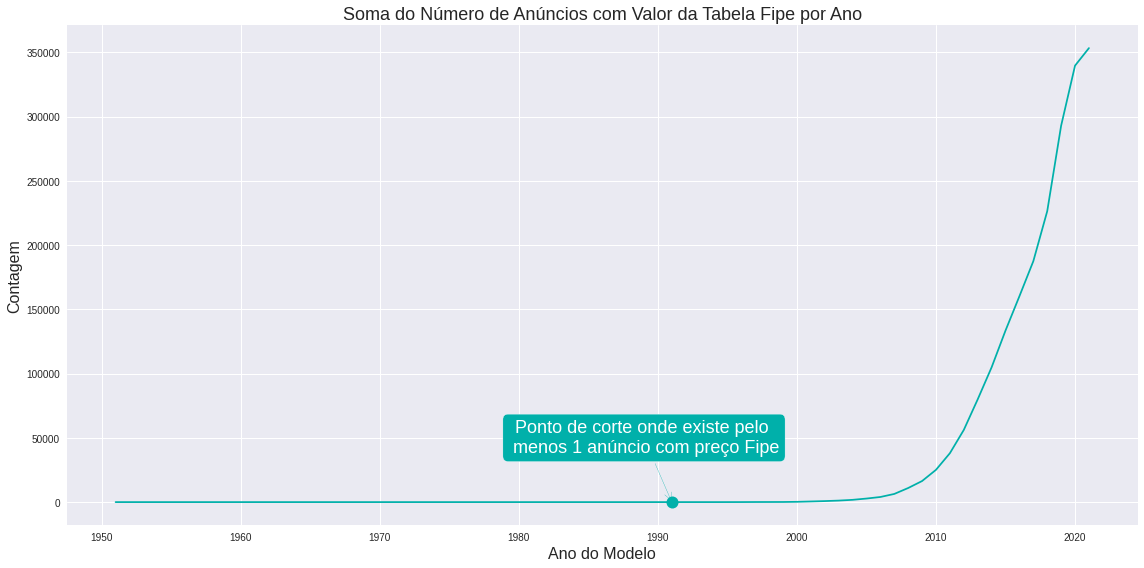

In [ ]:
#Gráfico do número de dados que possuem valor da tabela Fipe diferentes de Nan por ano
fig, ax = plt.subplots(figsize = (16,8))
ax = sns.lineplot(x = 'modelyear', y =  'anuncios', data = aux_data,color = '#00B0AA')
x, y = aux_data.loc[aux_data[aux_data['anuncios'] == 0 ]['modelyear'].idxmax()]
ax.annotate('Ponto de corte onde existe pelo \n menos 1 anúncio com preço Fipe', xy =(x,y),xytext = (x-2,50000),fontsize = 18,color = 'white',
            arrowprops=dict(arrowstyle='->', color='#00B0AA'), 
            horizontalalignment='center',  
            verticalalignment='center',           
            bbox=dict(boxstyle='round', fc='#00B0AA', color = 'white' ),
            ha='center',
            va='center')

plt.plot(x,y, marker="o", ms=12, color = '#00B0AA')
plt.xlabel('Ano do Modelo',fontdict = {'fontsize':16})
plt.ylabel('Contagem',fontdict = {'fontsize':16})
plt.title('Soma do Número de Anúncios com Valor da Tabela Fipe por Ano', fontdict = {'fontsize':18} )
plt.tight_layout()

In [ ]:
#Identificando total de veículos anteriores a 1991
veículosAntigos = data[data['modelyear'] <= 1990].shape[0]*100/data.shape[0]
print(f'Os veículos com ano anterior a 1992 correspodem a: {veículosAntigos:.2f}% do total.')

Os veículos com ano anterior a 1992 correspodem a: 0.04% do total.


Realizando um análise exploratória através do gráfico conhecido como "boxplot", nos permite verificar a presença de outliers. Muitos desses outliers são os veículos mais antigos.

Text(0.5, 1.0, 'Boxplot Ano de Fabricação dos Veículos ')

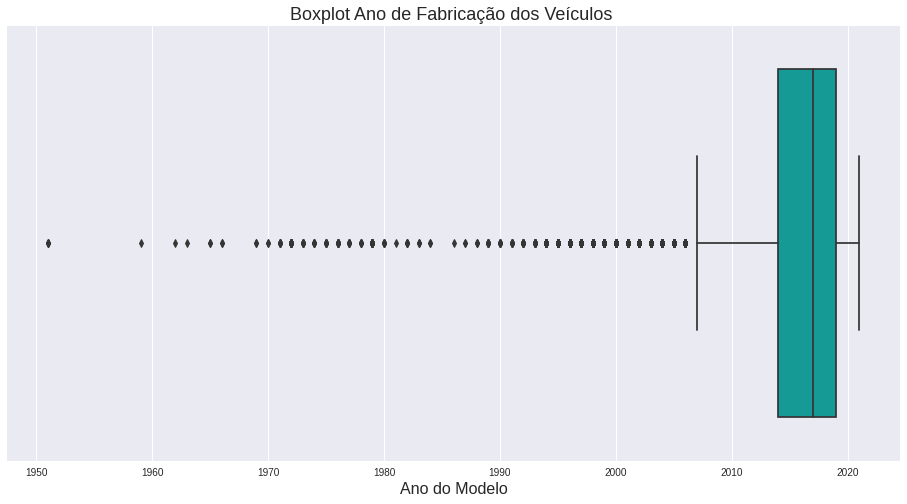

In [ ]:
plt.figure(figsize= (16,8))
sns.boxplot(x = 'modelyear', data = data, color = '#00B0AA')
plt.xlabel('Ano do Modelo',fontdict = {'fontsize':16})
plt.title('Boxplot Ano de Fabricação dos Veículos ', fontdict = {'fontsize':18} )

Contagem de anúncios dos veículos que possuem ano de fabricação de 2001 à 2021.

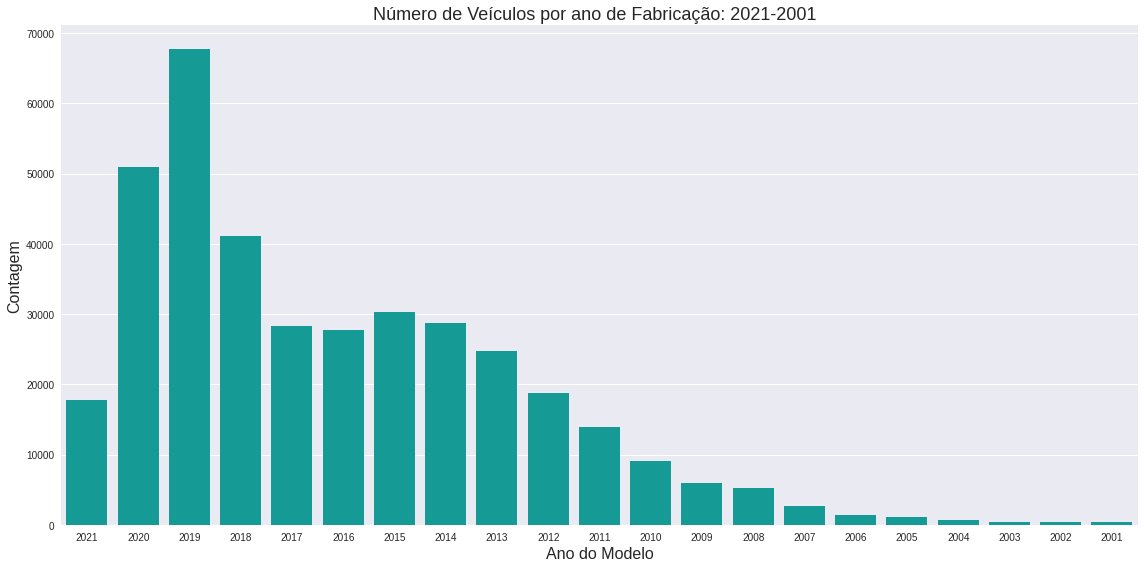

In [ ]:
#Separando os valores unicos de ano dos modelos
years = data['modelyear'].unique()
years[::-1].sort()
#Gráfico do número de veículos no periodo contenplado pelos dados presentes no site da fipe.
plt.figure(figsize= (16,8))
sns.countplot(x = 'modelyear',data = data, order = years[:21], color = '#00B0AA')
plt.xlabel('Ano do Modelo',fontdict = {'fontsize':16})
plt.ylabel('Contagem',fontdict = {'fontsize':16})
plt.title('Número de Veículos por ano de Fabricação: 2021-2001  ', fontdict = {'fontsize':18} )
plt.tight_layout()

Pode-se verificar que a grande maioria dos anúncios são de veículos de até 10 anos de fabricação. Uma pequena parcela são de veículos antigos e que não possuem dados sobre o valor da tabela Fipe. Neste caso, sugere-se a separação deste grupo e em um trabalho futuro explorar com relação a anúncios de veículos de nicho. Neste caso também, poderiam ser obtidas mais informações dessa classe de veículos, com uma categoria específica como a de "Clássicos", especialmente para os entusiastas.

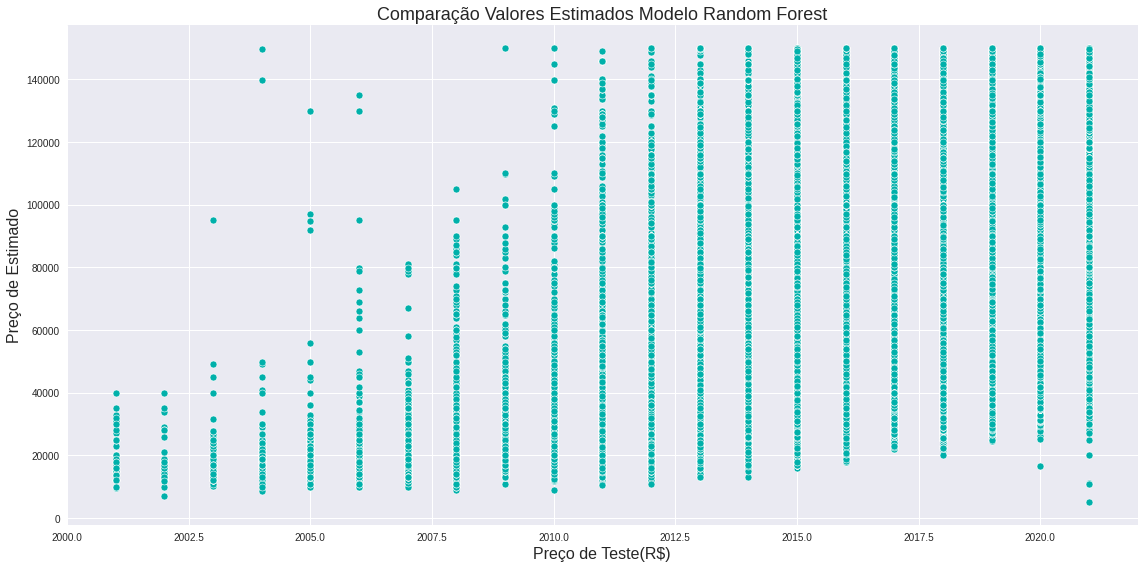

### Análise da feature 'Fipe_price'

Nesta análise descritiva, nota-se valores extremos com máximo em $R\$ 2.800.000,00$ e valor mínimo em $R\$5.000,00$.

In [ ]:
#Descrição dos dados fipe_price
data['fipe_price'].describe()

count    3.556700e+05
mean     5.369341e+04
std      4.012291e+04
min      5.107000e+03
25%      3.414200e+04
50%      4.285400e+04
75%      6.271600e+04
max      2.785120e+06
Name: fipe_price, dtype: float64

In [ ]:
#Verificando os porcentagem dos veículos com valor acima de 500.000 reais
veículosAltoValor = data[data['fipe_price'] >= 5e5].shape[0]*100/data.shape[0]
print(f'Veículos com valor da tabela Fipe acima de R$500.000,00: {veículosAltoValor:.2f}% do total.')

Veículos com valor da tabela Fipe acima de R$500.000,00: 0.06% do total.


In [ ]:
#Analisando algumas entradas com preço alto
data.query('fipe_price >5e5')

createdat        make  ...  create_m  create_y
7176   2020-10-02 04:51:46+00:00         BMW  ...   Outubro      2020
11403  2020-10-02 19:14:00+00:00         BMW  ...   Outubro      2020
11410  2020-10-02 19:18:10+00:00         BMW  ...   Outubro      2020
33351  2020-10-08 09:06:23+00:00         BMW  ...   Outubro      2020
33371  2020-10-08 09:11:09+00:00         BMW  ...   Outubro      2020
...                          ...         ...  ...       ...       ...
357451 2020-12-20 10:42:52+00:00      Nissan  ...  Dezembro      2020
358668 2020-12-20 14:15:17+00:00  Land Rover  ...  Dezembro      2020
368463 2020-12-23 09:41:51+00:00     Ferrari  ...  Dezembro      2020
374544 2020-12-27 09:01:36+00:00         BMW  ...  Dezembro      2020
374764 2020-12-27 09:57:14+00:00         BMW  ...  Dezembro      2020

[232 rows x 15 columns]

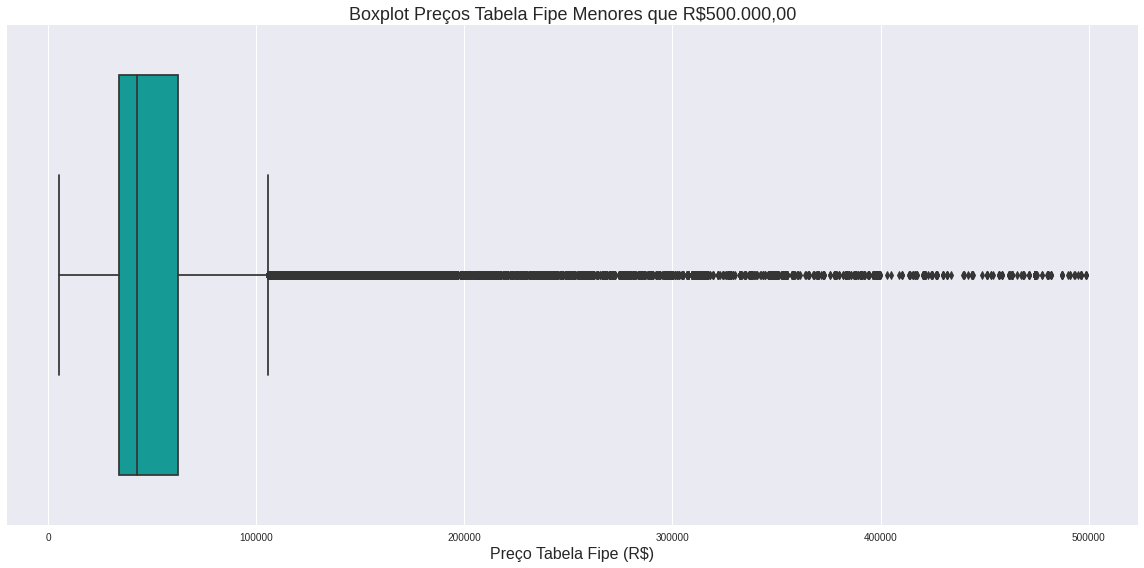

In [ ]:
#Gráfico boxplot até 500.000
plt.figure(figsize = (16,8))
sns.boxplot(x = 'fipe_price', data= data.query('fipe_price <=5e5'),color = '#00B0AA', )
plt.xlabel('Preço Tabela Fipe (R$)',fontdict = {'fontsize':16})
plt.title('Boxplot Preços Tabela Fipe Menores que R$500.000,00', fontdict = {'fontsize':18} )
plt.tight_layout()

É observado que mesmo filtrando os dados, ainda existem muitos outliers. Realizando uma nova filtragem, com valores de até $R\$ 150.000,00$. É possível verificar melhor a distribuiçao das solucões. 

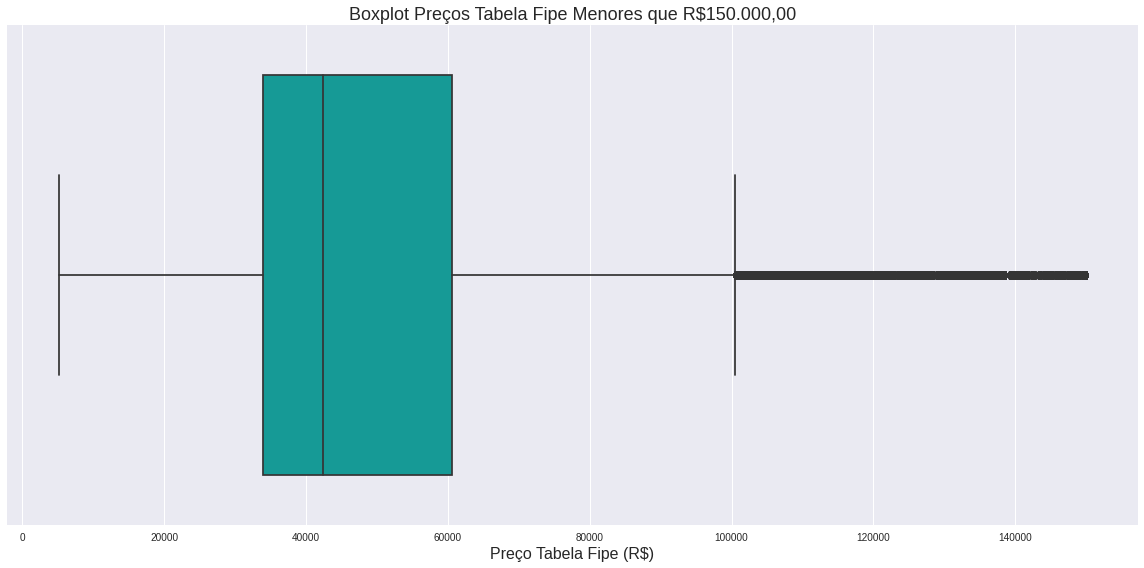

In [ ]:
#Gráfico boxplot até 150.000
plt.figure(figsize = (16,8))
sns.boxplot(x = 'fipe_price', data= data.query('fipe_price <=1.5e5'),color = '#00B0AA', )
plt.xlabel('Preço Tabela Fipe (R$)',fontdict = {'fontsize':16})
plt.title('Boxplot Preços Tabela Fipe Menores que R$150.000,00', fontdict = {'fontsize':18} )
plt.tight_layout()

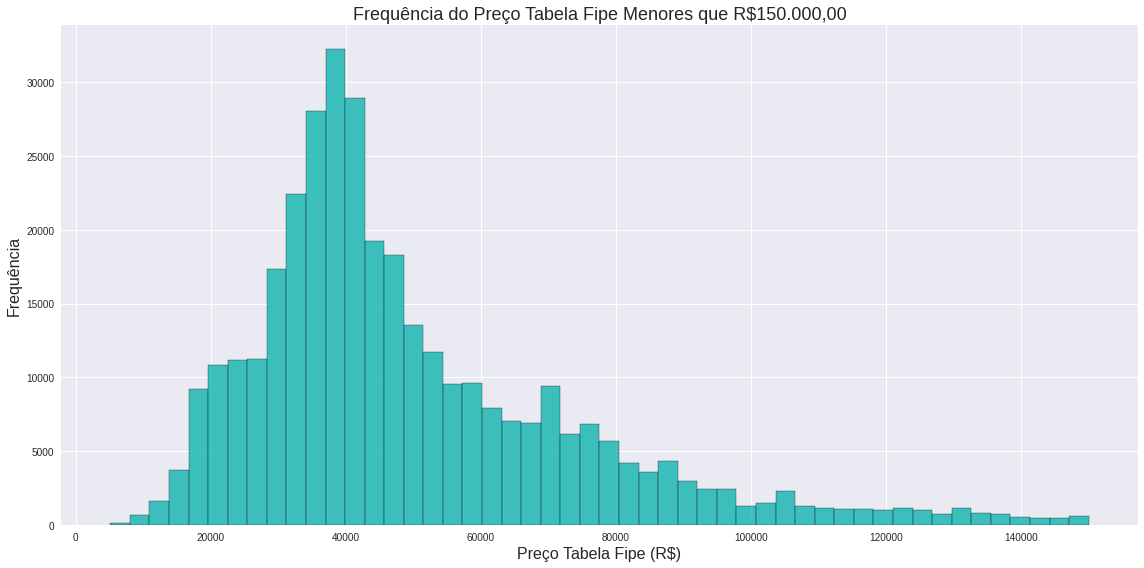

In [ ]:
#Histograma complementar
plt.figure(figsize = (16,8))
sns.histplot(x = 'fipe_price', data = data.query('fipe_price <= 1.5e5'), bins = 50, color = '#00B0AA' )
plt.xlabel('Preço Tabela Fipe (R$)',fontdict = {'fontsize':16})
plt.ylabel('Frequência',fontdict = {'fontsize':16})
plt.title('Frequência do Preço Tabela Fipe Menores que R$150.000,00', fontdict = {'fontsize':18} )
plt.tight_layout()

Variação dos preços da tabela Fipe dos 10 veículos mais anunciados. Neste caso, verifica-se uma grande variação nos casos dos modelos Corolla e Renegade. 

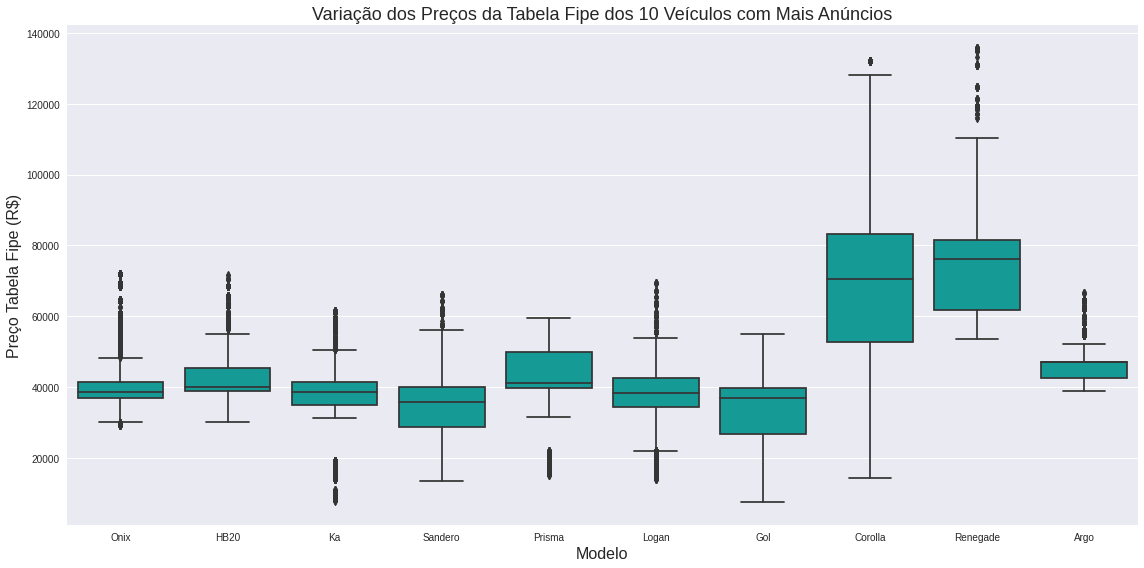

In [ ]:
maisAnuncios = data['model'].value_counts()[:10].index
plt.figure(figsize =(16,8))
sns.boxplot(x = 'model',y = 'fipe_price', data = data[data['model'].isin(maisAnuncios)], 
            order = maisAnuncios,color = '#00B0AA')
plt.xlabel('Modelo',fontdict = {'fontsize':16})
plt.ylabel('Preço Tabela Fipe (R$)',fontdict = {'fontsize':16})
plt.title('Variação dos Preços da Tabela Fipe dos 10 Veículos com Mais Anúncios', fontdict = {'fontsize':18} )
plt.tight_layout()

Como verificado na análise inicial, a variável fipe_price possuí o maior número de elementos 'nulos'. Sendo uma váriavel importante e com muitos amostras faltantes, planeja-se aplicar um inputer para preencher os valores faltante mais a frente.

In [ ]:
nulosFipePrice = sum(data['fipe_price'].isnull())
print(f'Valores nulos na feature fipe_price: {nulosFipePrice}')

Valores nulos na feature fipe_price: 22542


### Análise da feature 'price'

Utilizando o describe, já é possível notar os problemas de outliers: há valores de preço igual a zero e valores com preço muito extremos. Fora da realidade da variável. Utilizando o mesmo critéro que na feature fipe_price, valores menore que $R\$150.000,00$.

In [ ]:
data['price'].describe()

count    3.779830e+05
mean     6.057312e+04
std      1.829500e+06
min      0.000000e+00
25%      3.490000e+04
50%      4.497000e+04
75%      6.687500e+04
max      1.111111e+09
Name: price, dtype: float64

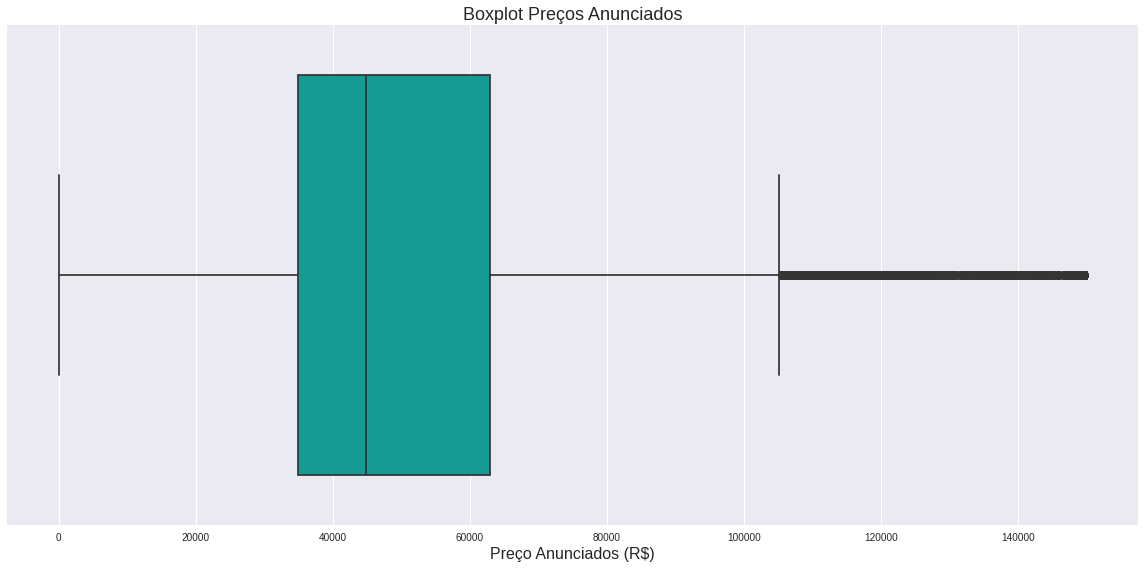

In [ ]:
#boxplot preços anunciados
plt.figure(figsize = (16,8))
sns.boxplot(x = 'price', data= data.query('price <=1.5e5'),color = '#00B0AA')
plt.xlabel('Preço Anunciados (R$)',fontdict = {'fontsize':16})
plt.title('Boxplot Preços Anunciados', fontdict = {'fontsize':18} )
plt.tight_layout()

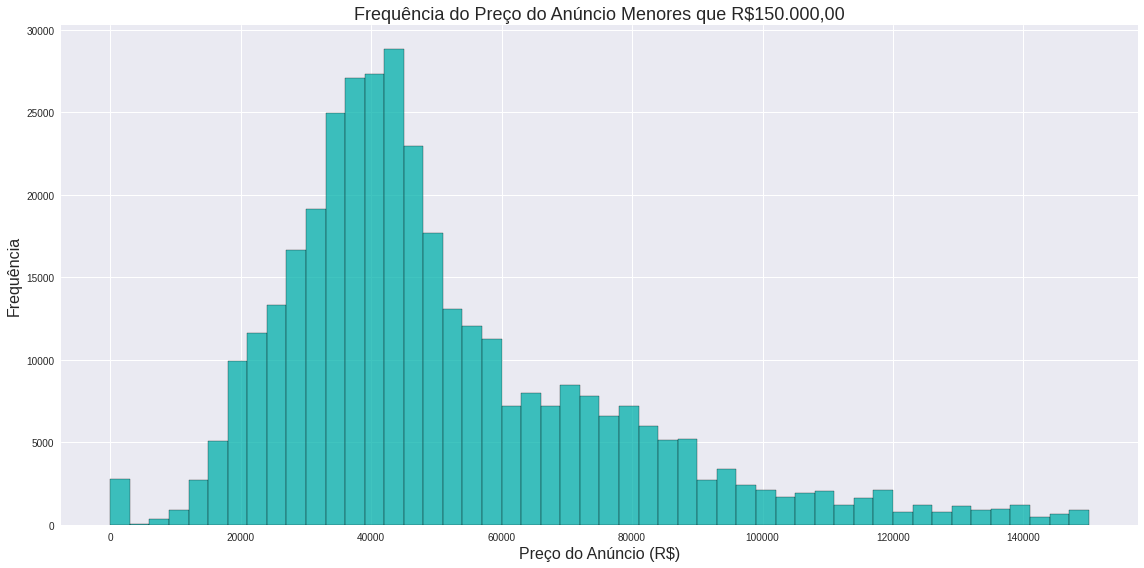

In [ ]:
#Distribuição precos 
plt.figure(figsize = (16,8))
sns.histplot(x = 'price', data = data.query('price <= 1.5e5'), bins = 50, color = '#00B0AA' )
plt.xlabel('Preço do Anúncio (R$)',fontdict = {'fontsize':16})
plt.ylabel('Frequência',fontdict = {'fontsize':16})
plt.title('Frequência do Preço do Anúncio Menores que R$150.000,00', fontdict = {'fontsize':18} )
plt.tight_layout()

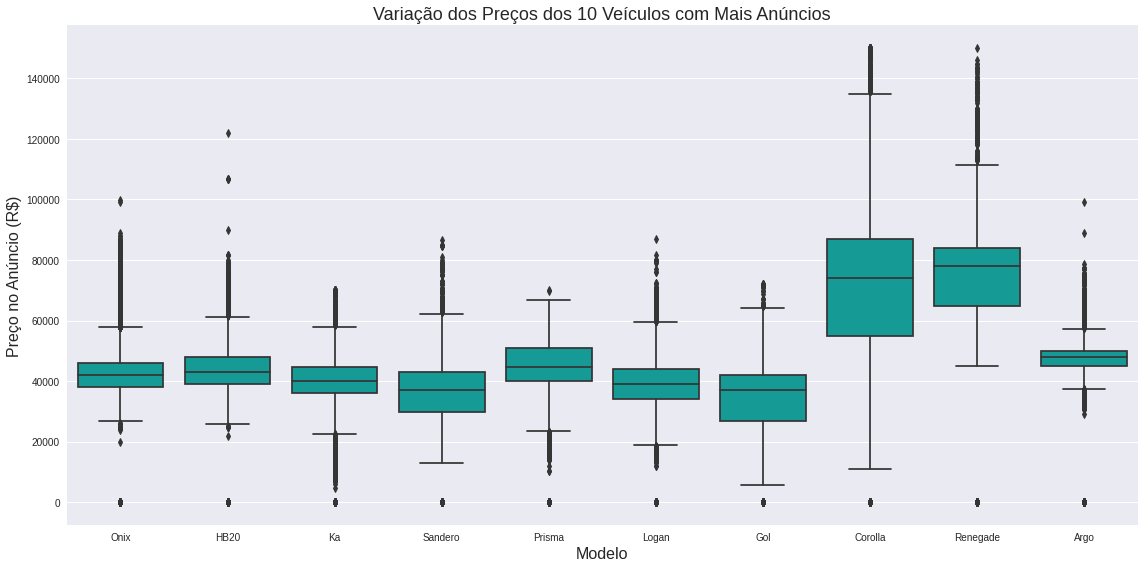

In [ ]:
maisAnuncios = data['model'].value_counts()[:10].index
plt.figure(figsize =(16,8))
sns.boxplot(x = 'model',y = 'price', data = data[(data['model'].isin(maisAnuncios))& (data['price']<=1.5e5)], 
            order = maisAnuncios,color = '#00B0AA')
plt.xlabel('Modelo',fontdict = {'fontsize':16})
plt.ylabel('Preço no Anúncio (R$)',fontdict = {'fontsize':16})
plt.title('Variação dos Preços dos 10 Veículos com Mais Anúncios', fontdict = {'fontsize':18} )
plt.tight_layout()

Analisando a variação dos valores dos 10 modelos mais anunciados percebe-se preços muito extremos e provavelmente incompatíveis com os modelos anunciados. Outro ponto, é que os valores parecem estar  acima do valor da tabela Fipe.

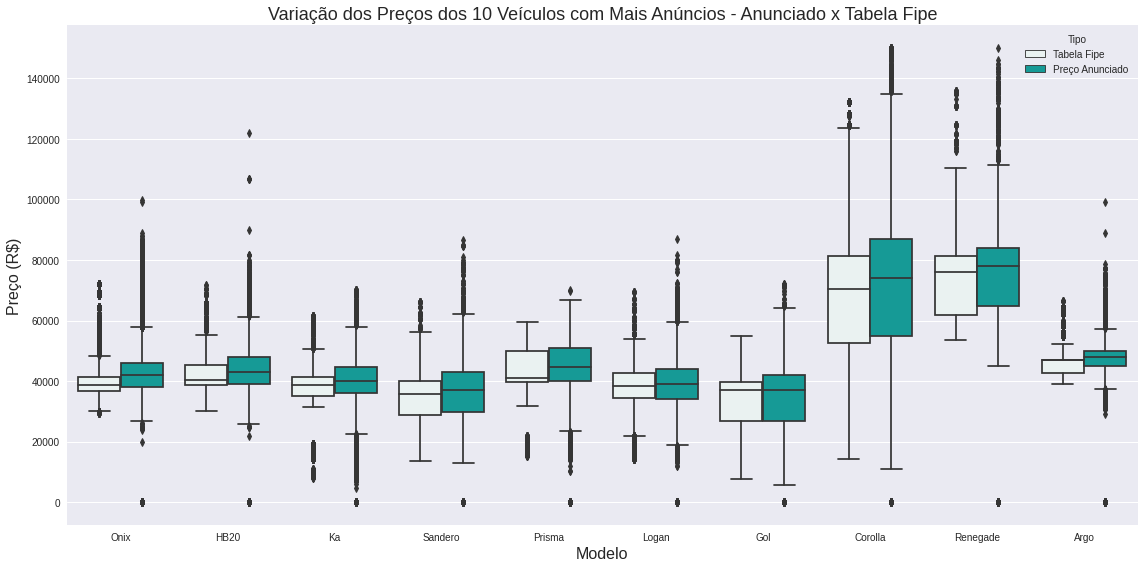

In [ ]:
plt.figure(figsize = (16,8))
df_plot = data[(data['model'].isin(maisAnuncios)) & (data['price']<= 1.5e5)].melt(id_vars='model', value_vars=["fipe_price", "price"])
ax = sns.boxplot(x='model', y='value', hue='variable', data=df_plot, color = '#00B0AA', order= maisAnuncios)
ax.legend(title='Tipo')
for i, l in enumerate(['Tabela Fipe', 'Preço Anunciado']):
    ax.legend_.texts[i].set_text(l)
plt.xlabel('Modelo',fontdict = {'fontsize':16})
plt.ylabel('Preço (R$)',fontdict = {'fontsize':16})
plt.title('Variação dos Preços dos 10 Veículos com Mais Anúncios - Anunciado x Tabela Fipe', fontdict = {'fontsize':18} )
plt.tight_layout()

In [ ]:
nulosPrice = sum(data['price'].isnull())
print(f'Valores nulos na feature price: {nulosPrice}')

Valores nulos na feature price: 229


Correlacioando as duas variáveis 'fipe_price' e 'price', com valores extremos filtrados. Como esperado, as duas variáveis possuem uma alta correlação.

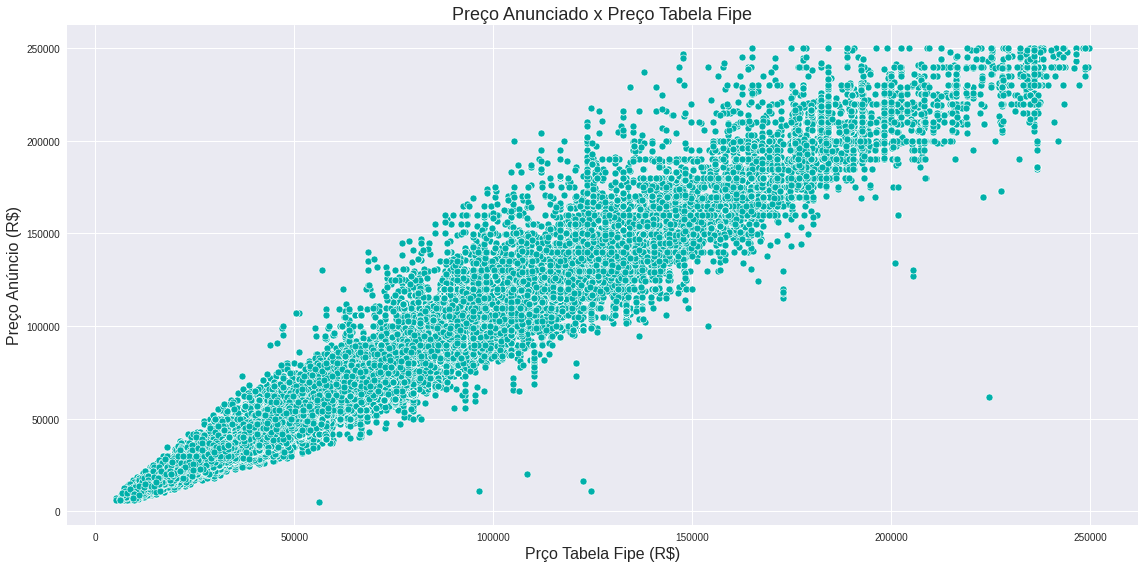

In [ ]:
#Plot bivariado Price x fipe_price
plt.figure(figsize = (16,8))
sns.scatterplot(x = 'fipe_price', y = 'price', data = data[ (data['fipe_price']<=2.5e5) & (data['price']<=2.5e5) & (data['price']>=5e3)],
                color ='#00B0AA')
plt.ylabel('Preço Anúncio (R$)',fontdict = {'fontsize':16})
plt.xlabel('Prço Tabela Fipe (R$)',fontdict = {'fontsize':16})
plt.title('Preço Anunciado x Preço Tabela Fipe', fontdict = {'fontsize':18} )
plt.tight_layout()

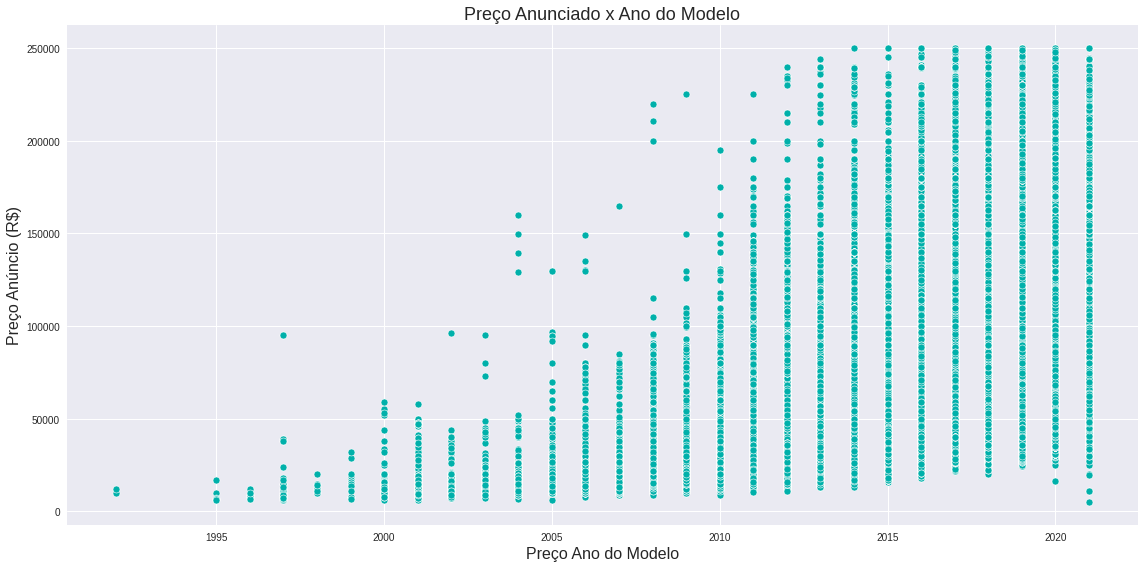

In [ ]:
#Plot bivariado Price x fipe_price
plt.figure(figsize = (16,8))
sns.scatterplot(x = 'modelyear', y = 'price', data = data[ (data['fipe_price']<=2.5e5) & (data['price']<=2.5e5) & (data['price']>=5e3)],
                color ='#00B0AA')
plt.ylabel('Preço Anúncio (R$)',fontdict = {'fontsize':16})
plt.xlabel('Preço Ano do Modelo',fontdict = {'fontsize':16})
plt.title('Preço Anunciado x Ano do Modelo', fontdict = {'fontsize':18} )
plt.tight_layout()

### Análise da feature 'km'

Utilizando o describe, já é possível notar os problemas de outliers: há valores valores muito extremos.

In [ ]:
#Análise descritiva dos  dados.
data['km'].describe()

count    3.755630e+05
mean     9.476144e+12
std      3.150782e+15
min      0.000000e+00
25%      2.800000e+04
50%      4.820500e+04
75%      8.443700e+04
max      1.111111e+18
Name: km, dtype: float64

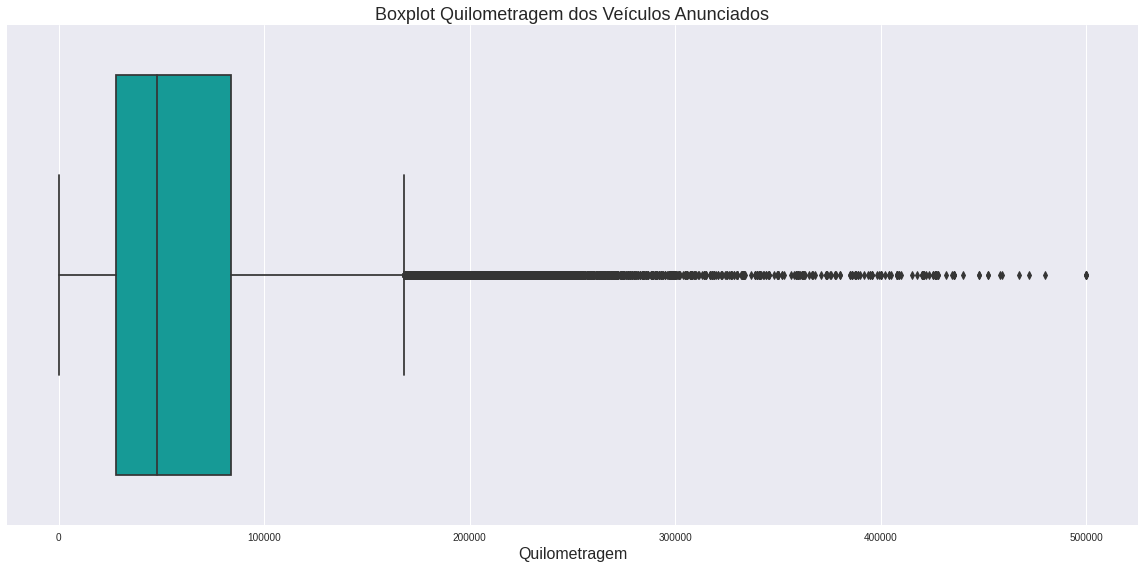

In [ ]:
#Gráfico de caixa para os valores de quilometragem
plt.figure(figsize = (16,8))
sns.boxplot(x = 'km', data = data[data['km']<= 5e5],color = '#00B0AA')
plt.xlabel('Quilometragem',fontdict = {'fontsize':16})
plt.title('Boxplot Quilometragem dos Veículos Anunciados', fontdict = {'fontsize':18} )
plt.tight_layout()

Realizou-se o agrupamento em categorias para a quilometragem dos véiculos anunciados. As categorias variam de de $5000$ Km até $200.000$ Km, com granularidade de $5.000$ Km. Optou-se pelo teto máximo inicialmente de  $200.000$ Km por considerar que valores mais elevados não seriam tão atrativos e muitos podem foram identificados como outliers.

In [ ]:
#Criando os ranges dos grupos de Km
bins = np.arange(0,200000,5000)
labels = np.arange(5000,200000,5000)
data['km_groups'] = pd.cut(data['km'], bins = bins, labels = labels,include_lowest = False)

Na sequência plotou-se os preços médios, tanto tabela Fipe quando o anunciado, com relação aos grupos gerados. Como varificado anteriormente, o preço anunciado é em médio maior que o apresentado na tabela Fipe. Outro ponto observado, a medida que o veículo apresenta mais quilometros rodados, mais barato é anunciado.

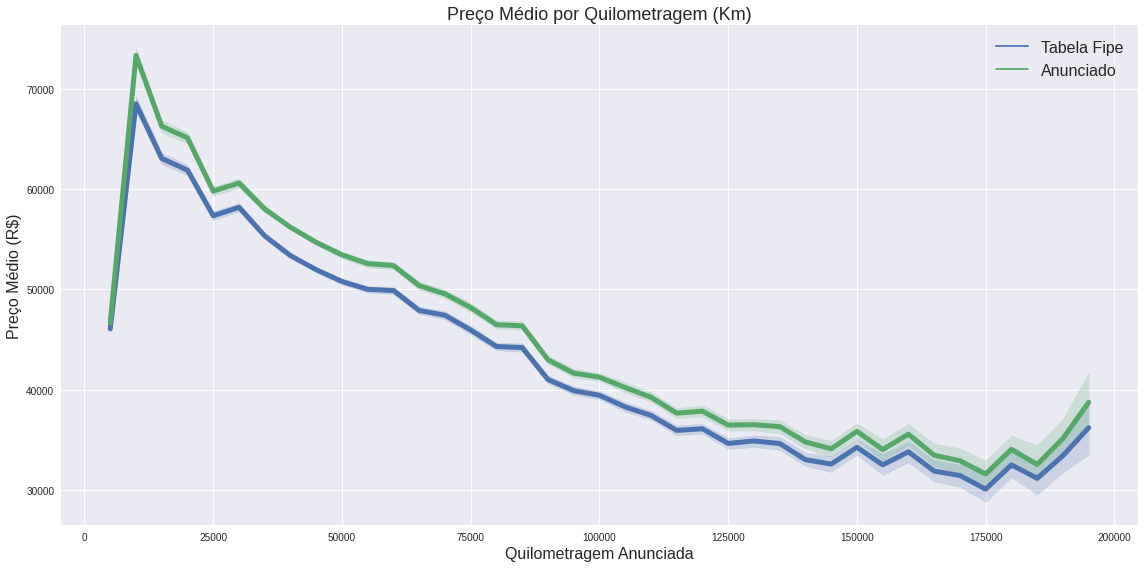

In [ ]:
#Gráfico preços médios, fipe e anunciado, por categoria de Km
plt.figure(figsize = (16,8))
df_plot =  data[(data['price']>=5e3) & (data['price']<=1.5e5) & (data['fipe_price']<=1.5e5)].melt(id_vars='km_groups', value_vars=["fipe_price", "price"])
ax = sns.lineplot(x ='km_groups', y ='value',hue = 'variable', data = df_plot, estimator = 'mean', color ='#00B0AA', linewidth = 5)
ax.legend(prop={'size':16})
for i, l in enumerate(['Tabela Fipe', 'Anunciado']):
    ax.legend_.texts[i].set_text(l)

plt.xlabel('Quilometragem Anunciada',fontdict = {'fontsize':16})
plt.ylabel('Preço Médio (R$)',fontdict = {'fontsize':16})
plt.title('Preço Médio por Quilometragem (Km)', fontdict = {'fontsize':18} )
plt.tight_layout()

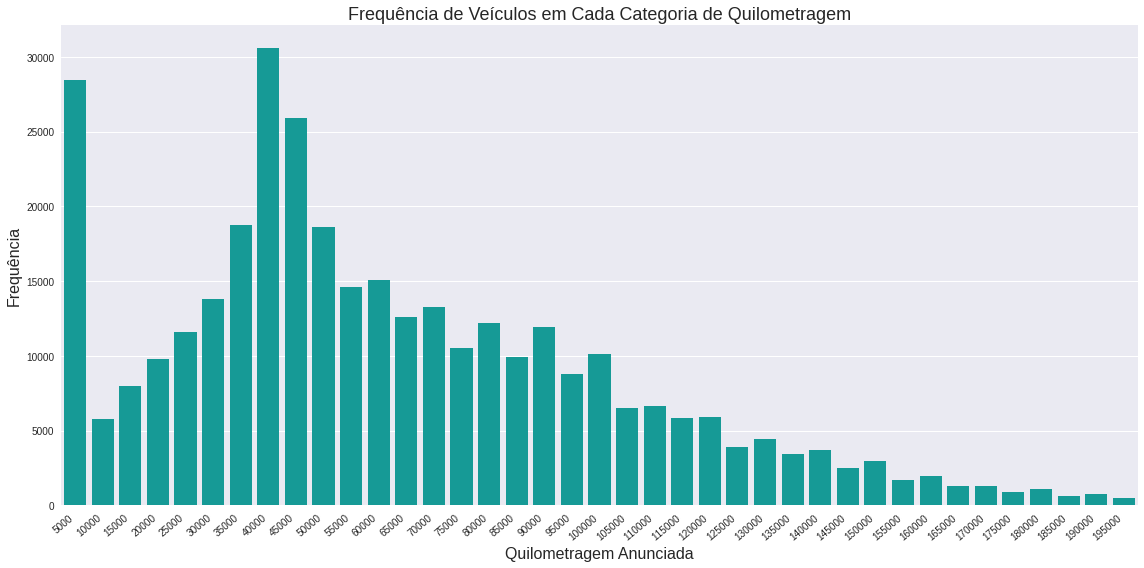

In [ ]:
plt.figure(figsize = (16,8))
ax = sns.countplot(x = 'km_groups', data= data, color = '#00B0AA')
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.xlabel('Quilometragem Anunciada',fontdict = {'fontsize':16})
plt.ylabel('Frequência',fontdict = {'fontsize':16})
plt.title('Frequência de Veículos em Cada Categoria de Quilometragem', fontdict = {'fontsize':18} )
plt.tight_layout()

### Análise da feature 'region'

In [ ]:
#Carregando o map com os estados no formato shp.
fp = 'estados_2010.shp'
map_df = gpd.read_file(fp)

É realizada contagem de anúncios de cada estado. Essa contagem poderia ter sido feito pela feature 'phonearea', porém decidiu-se manter a granularidade por estado.

In [ ]:
#Contando o número de amostras de cada estado.
data_aux = pd.DataFrame(data['region'].value_counts()*100/data.shape[0]).reset_index()
data_aux.columns = ['region','total']

In [ ]:
#realizada o merge de dfs, map com o df auxiliar contendo a contagem de anúncios em cada estado
merged = map_df.set_index('sigla').join(data_aux.set_index('region'))
merged = merged.reset_index()

[Text(1, 0, '0.0%'),
 Text(1, 0, '20.0%'),
 Text(1, 0, '40.0%'),
 Text(1, 0, '60.0%'),
 Text(1, 0, '80.0%'),
 Text(1, 0, '100.0%')]

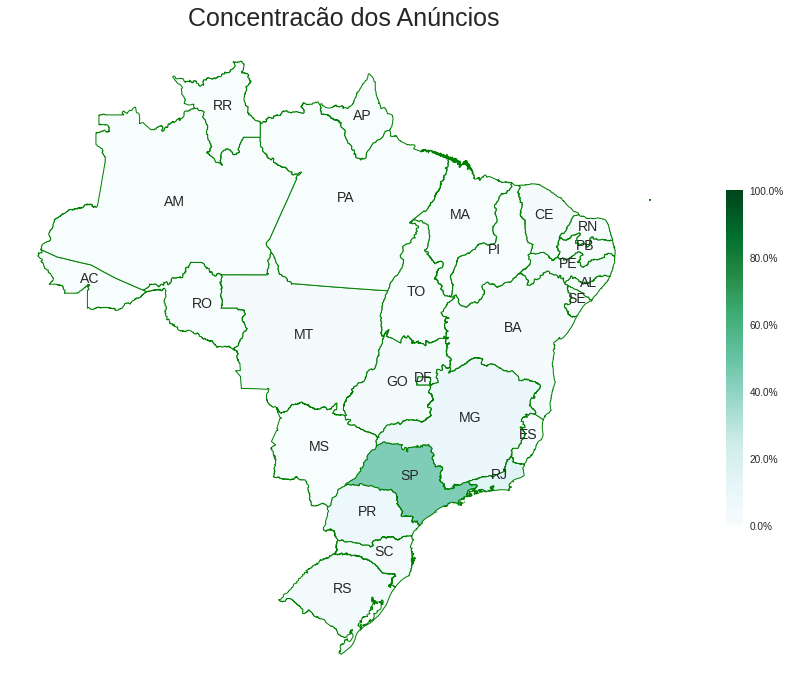

In [ ]:
#Mapa de calor com a concentração de anúncios por estado.
fig, ax = plt.subplots(1, figsize=(20, 12))
merged.apply(lambda x: ax.annotate(s=x.sigla , xy=x.geometry.centroid.coords[0], ha='center', fontsize=14),axis=1)
merged.plot(column='total', cmap = 'BuGn',linewidth=1, ax=ax, edgecolor='green', vmin = 0, vmax =100)
ax.axis('off')
ax.set_title('Concentracão dos Anúncios', fontdict={'fontsize': '25', 'fontweight' : '3'})
sm = plt.cm.ScalarMappable(cmap='BuGn', norm=plt.Normalize(vmin=0, vmax=1))
cbar = fig.colorbar(sm,fraction=1.5e-2, pad=0.04)
cbar.ax.set_yticklabels(["{:.1%}".format(i) for i in cbar.get_ticks()])

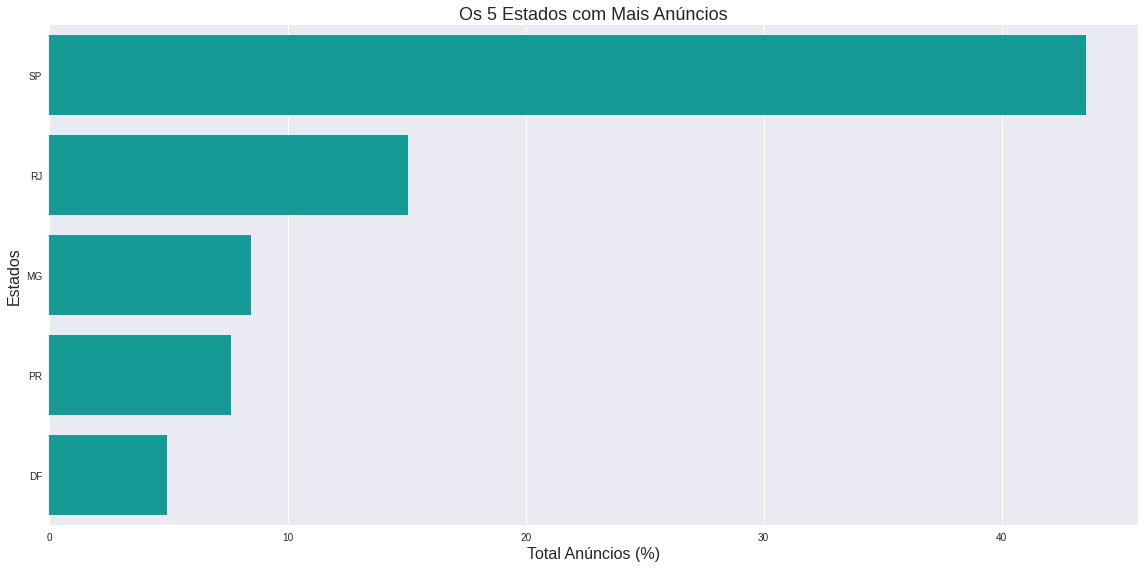

In [ ]:
plt.figure(figsize=(16,8))
sns.barplot(x = 'total', y = 'region', data = data_aux[:5], color = '#00B0AA')
plt.xlabel('Total Anúncios (%)',fontdict = {'fontsize':16})
plt.ylabel('Estados',fontdict = {'fontsize':16})
plt.title('Os 5 Estados com Mais Anúncios', fontdict = {'fontsize':18} )
plt.tight_layout()

Analisando o preço médio dos veículos anunciados por estado

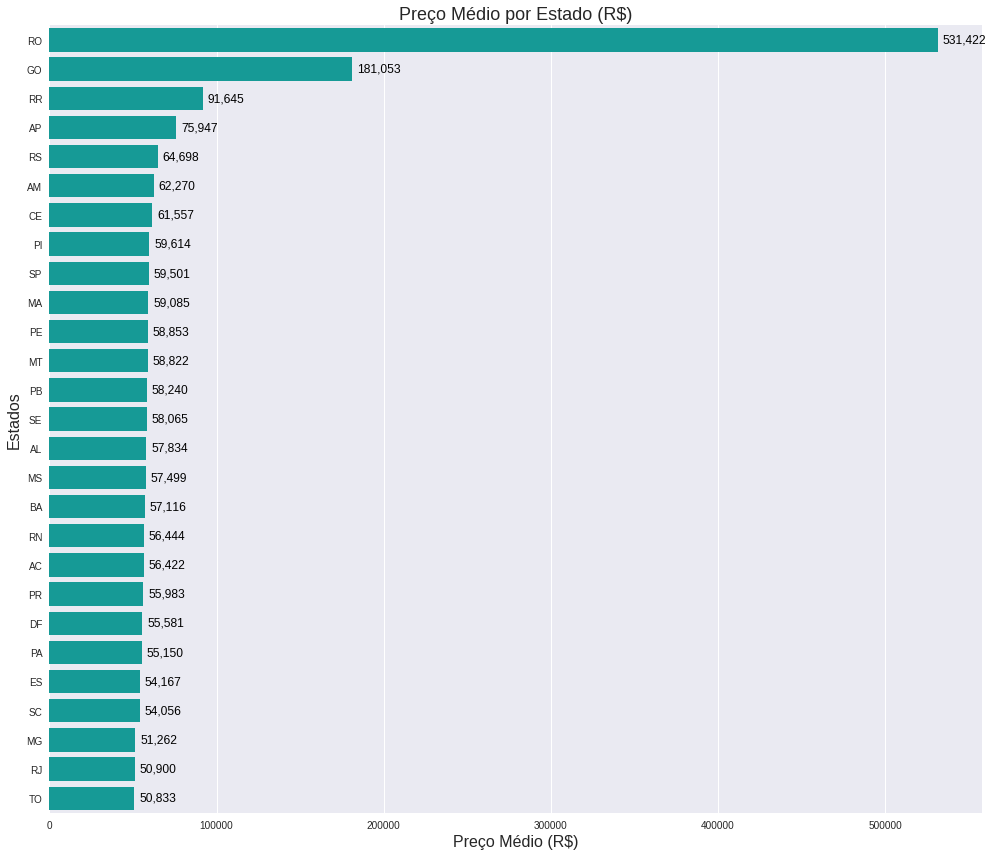

In [ ]:
#Calculando o preço médio por categoria e plotando
plt.figure(figsize= (14,12))
var = 'region'
order = (data.groupby(var)['price'].mean()).sort_values(ascending = False).index
ax = sns.barplot(y = var, x = 'price',data = data.groupby(var, as_index = False)['price'].mean() , order = order, color = '#00B0AA')
for p in ax.patches:
    ax.annotate("{:,.0f}".format(p.get_width()), (p.get_x() + p.get_width(), p.get_y() + 0.5),
                xytext=(5, 0), textcoords='offset points',color = 'black', size = 12)
    
    # ax.annotate("{:.1f}".format(p.get_width()), (p.get_x() + p.get_width() / 2.,
    #                                       p.get_height()), ha='center', 
    #                                       va='center', xytext=(0, 10), 
    #                                       textcoords='offset points',       
    #                                        )
plt.xlabel('Preço Médio (R$)',fontdict = {'fontsize':16})
plt.ylabel('Estados',fontdict = {'fontsize':16})
plt.title('Preço Médio por Estado (R$)', fontdict = {'fontsize':18} )
plt.tight_layout()

### Análise da feature 'color'

Na variável de cor dos veículos, é percebida a presença de algumas cores bem específicas e com baixo número de amostras. Cores predominantes: Branco, Prata, Preto e Cinza. Há também um categoria chamada de 'Várias', seriam os veículos 'adesivados'?

In [ ]:
coresUnicas = data['color'].unique()
print(coresUnicas)

['Cinza' 'Branco' 'Vermelho' 'Prata' 'Preto' 'Bronze' 'Verde' 'Azul'
 'Vinho' 'Bege' 'Laranja' 'Não Informada' 'Marrom' 'Roxo' 'Várias'
 'Amarelo' 'Dourado' 'Rosa']


Para a visualização optou-se por um gráfico de pizza, (apenas para variar os gráficos e apesar de não ser o mais recomendado em muitos casos). Para esta tarefa, agrupou-se as cores com um porcetagem pequena na categoria "Outro" 

In [ ]:
data['color'].value_counts().index[7:]

Index(['Marrom', 'Verde', 'Bege', 'Várias', 'Laranja', 'Vinho', 'Amarelo',
       'Dourado', 'Bronze', 'Roxo', 'Rosa'],
      dtype='object')

In [ ]:
#Ajustando variáveis para montar o gráfico
#Agrupando cores na categoria Outros 
order = data['color'].value_counts()[:6].index.to_list()
colors = ['white','silver','black','gray', 'red','blue','#00B0AA']
order.append('Outros - '+' '.join(data['color'].value_counts().index[7:]))
sizes = data['color'].value_counts()/data.shape[0]
sizesL = sizes[:6]
sumValues = sum(sizes[7:])
sizesL = sizesL.to_list()
sizesL.append(sumValues)

In [ ]:
#Pie Chart Para verificar as Cores presentes nos veículos
fig = make_subplots(rows=1, cols=1, specs=[[{'type':'domain'}]])
fig.add_trace(go.Pie(labels=order, values=sizesL, name="Cores" , 
                     marker=dict(colors=colors, line=dict(color='#000000', width=2)), showlegend = False),
              1, 1)
fig.update_traces(hole=.6, hoverinfo="label+percent")
fig.update_layout(title_text="Principais Cores dos Veículos Anunciados")

In [ ]:
#verificando a quantidade de cores com o label "Não Informada"
data[data['color'] =='Não Informada']['color'].value_counts()

Não Informada    3962
Name: color, dtype: int64

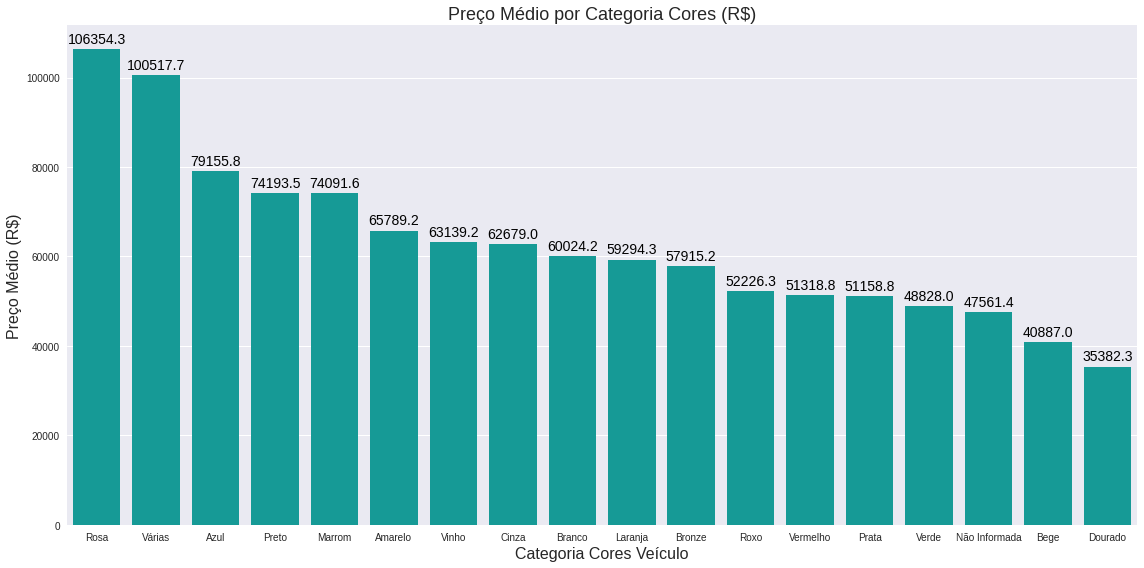

In [ ]:
#Calculando o preço médio por categoria e plotando
plt.figure(figsize= (16,8))
var = 'color'
order = (data.groupby(var)['price'].mean()).sort_values(ascending = False).index
ax = sns.barplot(x = var, y = 'price',data = data.groupby(var, as_index = False)['price'].mean() , order = order, color = '#00B0AA' )
for p in ax.patches:
    ax.annotate("{:.1f}".format(p.get_height()), (p.get_x() + p.get_width() / 2.,
                                          p.get_height()), ha='center', 
                                          va='center', xytext=(0, 10), 
                                          textcoords='offset points',       
                                           color = 'black', size = 14)
plt.xlabel('Categoria Cores Veículo',fontdict = {'fontsize':16})
plt.ylabel('Preço Médio (R$)',fontdict = {'fontsize':16})
plt.title('Preço Médio por Categoria Cores (R$)', fontdict = {'fontsize':18} )
plt.tight_layout()

### Análise da feature 'engine'

Logo de início já é percebido muitas categorias, e aparentemente muitas delas possuem uma única amostra. 

In [ ]:
data['engine'].unique()

array(['1.5', '2.0', '1.6', '1.0', '2', '1.2', '1.8', '1.7', '1.4', nan,
       '3.0', '1', '1.3', '3.8', '2.8', '2.3', '3.2', '3.3', '3.6', '2.4',
       '2.5', '3.5', '3.0 24V seis cilindros em linha', '1.6 16v', '2.2',
       '2.7', '1.0 Total Flex', '1.8 16V VVT-i Flex',
       'Beta Hi-Tech 2.0 16V DOHC', '1.8 i-VTEC', '1.0 8V Flex',
       '1.6 8V Flex', '2.0 FSI', '2.0 16V', '4.8', '1.6 8V Rocam  Flex',
       '4.4', '2.1', '1.6 8V', '1.0 SOHC Flex', '1.8 8V Flex',
       '1.9 16V Flex', '3.4', '3.0 24v', '1.6 Flex', '1.1', '6.2', '3',
       '5.2', '1.5 Turbo', '2.8 turbo', '3.7', '4.2', '1.9 8v', '3.6 V6',
       '1.6 MSI', '200 TSI 1.0', '250 TSI 1.4', '2.0 16v a gasolina',
       '1.6 8V VHT Total Flex', '2.9', '4.5 V8', '3.0 16V Turbo',
       '2.7 V6', '2.5 8V Turbo', '6.2 V8', '6.7', '1.8 8v total-flex',
       '3.2 16V', '2.0 FSI Turbo', 'Power Stroke 3.0L Electronic Turbo',
       '1.8 MI', 'i-VTEC 2.0 16V', '2.0 SOHC i-VTEC 16V', '1.4 8V Flex',
       '5.0', 'Cummins T

Para facilitar as análises e uma vez visto que muitos dos veículos estão com essa feature na categoria de motor $1.0$ até $3.0$, foi desenvolvida uma função para tentar extrair as cilindradas de cada motor fornecida na feature 'engine'. Criando assim um padrão contendo apenas as CC.

In [ ]:
def isDigit(x):
    #Difente da função isdigit() da string, 
    #verificar Numeros Float em Strings
    try:
        float(x)
        return True
    except ValueError:
        return False

def extractEngine(x):
    #Função para extrair as cc da feature Engie
    # caso encontrada, retorna o valor caso não,
    # retorna 'Não Fornecida' 
    if x == 'nan':
        return 'Não Fornecido'
    x = str(x)
    for i in x.split():
        if isDigit(i):
            try:
                int(i)
            except ValueError:
                return i

   
    return 'Não Fornecido'


In [ ]:
#Extraindo as cc da coluna 'engine' e criando a nova feature 'cc_engine'
data['cc_engine'] = data['engine'].apply(lambda row: extractEngine(row))

In [ ]:
#Verificando o resultado
data.head()

createdat        make    model  ...  create_y  km_groups  cc_engine
0 2020-10-01 00:04:06+00:00        Ford       Ka  ...      2020      30000        1.5
1 2020-10-01 00:44:06+00:00     Hyundai     ix35  ...      2020      25000        2.0
2 2020-10-01 01:05:18+00:00  Volkswagen  Saveiro  ...      2020      60000        1.6
3 2020-10-01 01:05:41+00:00   Chevrolet   Prisma  ...      2020     125000        1.0
4 2020-10-01 01:08:43+00:00        Fiat      Uno  ...      2020      65000        1.0

[5 rows x 17 columns]

In [ ]:
maismotores10 = sum(data['cc_engine'].value_counts()[:10])*100/data.shape[0]
print(f'Os 10 motores mais comuns nos anúncios correspondem a: {maismotores10:.2f}% do total.')

Os 10 motores mais comuns nos anúncios correspondem a: 94.06% do total.


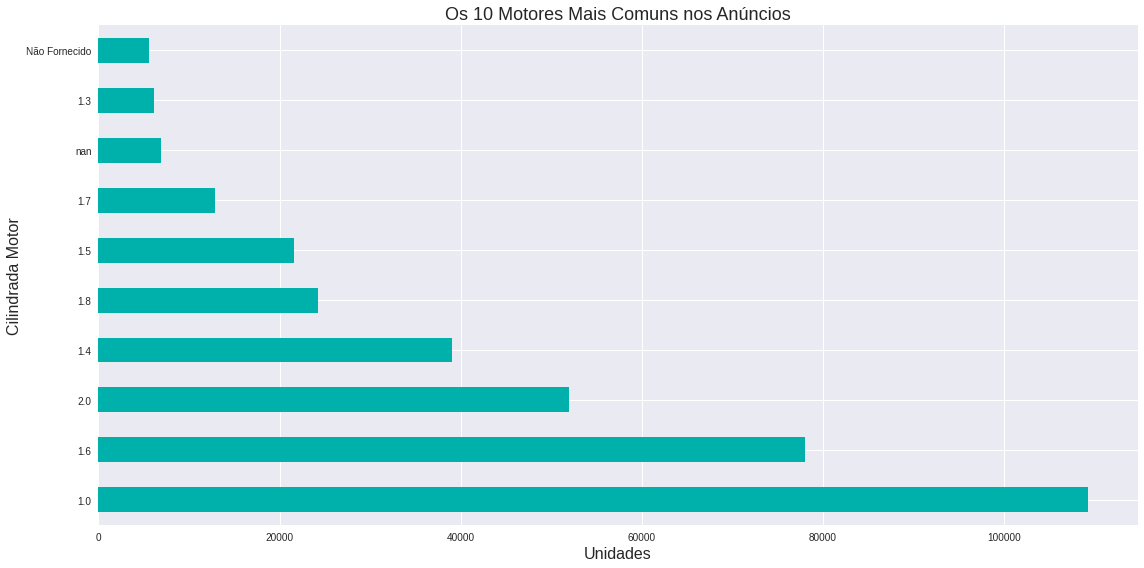

In [ ]:
#Analisando as 10 maios cc do motor presentes no dataset
plt.figure(figsize = (16,8))
ax = data['cc_engine'].value_counts()[:10].plot.barh(color = '#00B0AA')

plt.xlabel('Unidades',fontdict = {'fontsize':16})
plt.ylabel('Cilindrada Motor',fontdict = {'fontsize':16})
plt.title('Os 10 Motores Mais Comuns nos Anúncios', fontdict = {'fontsize':18} )
plt.tight_layout()

Pode-se averigar que o carro com o motor do tipo $1.0$ é o mais anúnciado, seguido dos motores $1.6$ e $2.0$. Motores com mais cilindradas são minoria. Além de haver uma quantidade considerável de veículos sem essa informação. Essa categoria parece despadronizada, seria interessante dividir em sub-categorias, com mais informações dos motores.

### Análise da feature 'fuel'

A maioria dos veículos apresentados apresenta é do tipo Flex.

In [ ]:
#Verificando as categorias presentes.
data['fuel'].unique()

array(['Flex', 'Gasolina', 'Diesel'], dtype=object)

In [ ]:
#Contagem dos valores.
data['fuel'].value_counts()

Flex        327273
Gasolina     40070
Diesel       10869
Name: fuel, dtype: int64

In [ ]:
#ajustando variáveis para plot
order  = data['fuel'].unique()
sizesL = data['fuel'].value_counts() 

#Pie Chart Para verificar as Cores presentes nos veículos
fig = make_subplots()
fig.add_trace(go.Pie(labels=order, values=sizesL, name="Cores" , 
                     marker=dict(line=dict(color='#000000', width=2))))
fig.update_traces(hoverinfo="label+percent")
fig.update_layout(title_text="Categoria Combustível Motores")

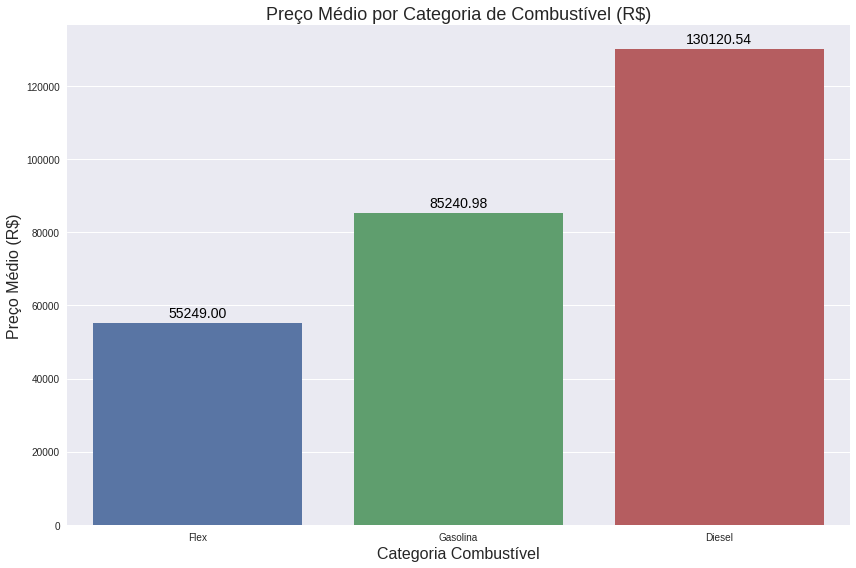

In [ ]:
plt.figure(figsize= (12,8))
ax = sns.barplot(x = 'fuel', y = 'price',data = data.groupby('fuel', as_index = False)['price'].mean() , order = data['fuel'].value_counts().index)
for p in ax.patches:
    ax.annotate("{:.2f}".format(p.get_height()), (p.get_x() + p.get_width() / 2.,
                                          p.get_height()), ha='center', 
                                          va='center', xytext=(0, 10), 
                                          textcoords='offset points',       
                                           color = 'black', size = 14)
plt.xlabel('Categoria Combustível',fontdict = {'fontsize':16})
plt.ylabel('Preço Médio (R$)',fontdict = {'fontsize':16})
plt.title('Preço Médio por Categoria de Combustível (R$)', fontdict = {'fontsize':18} )
plt.tight_layout()

### Análise da feature, 'bodystyle'

A maioria dos veículos se enquadra na categoria Hatch e como verificado anteriormente, o Onix é o carro mais anunciado, sendo responsável por quase $1/3$ dessa categoria.

In [ ]:
#Modelos únciso de veículos
data['bodystyle'].unique()

array(['Hatch', 'SUV', 'Picapes', 'Sedan', 'Monovolume', 'SW/Perua',
       'Van/Furgão', 'Conversível', 'Coupê', 'Street'], dtype=object)

In [ ]:
#ajustando variáveis para plot
order  = list(data['bodystyle'].unique()[:5])
sizesL = list(data['bodystyle'].value_counts()[:5])
order.append('Outros: ' +','.join(data['bodystyle'].value_counts().index[5:]))
sizesL.append(data['bodystyle'].value_counts()[5:].sum())

#Pie Chart Para verificar as bodystyle presentes nos veículos
fig = make_subplots()
fig.add_trace(go.Pie(labels=order, values=sizesL, name="Cores" , 
                     marker=dict(line=dict(color='#000000', width=2))))
fig.update_traces(hoverinfo="label+percent")
fig.update_layout(title_text="Categorias Design Veículos ")

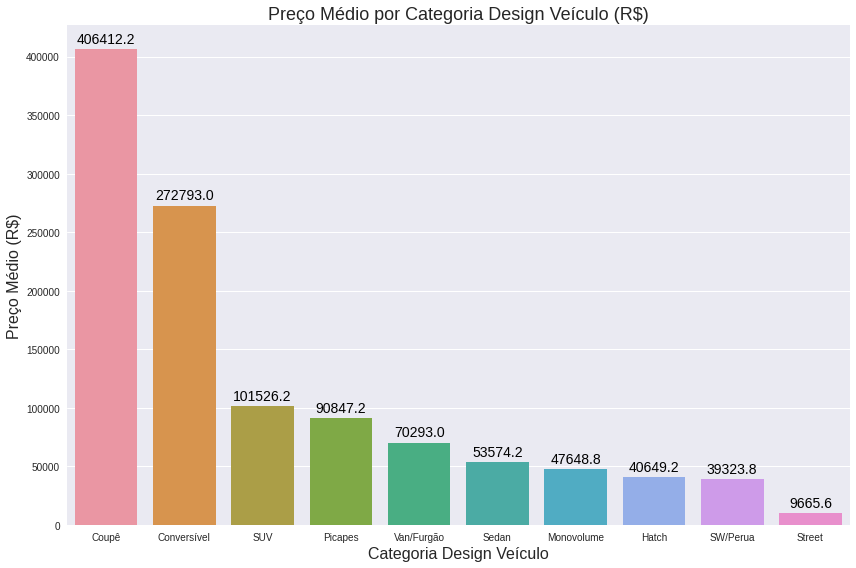

In [ ]:
#Calculando o preço médio por categoria e plotando
plt.figure(figsize= (12,8))
var = 'bodystyle'
order = (data.groupby(var)['price'].mean()).sort_values(ascending = False).index
ax = sns.barplot(x = var, y = 'price',data = data.groupby(var, as_index = False)['price'].mean() , order = order)
for p in ax.patches:
    ax.annotate("{:.1f}".format(p.get_height()), (p.get_x() + p.get_width() / 2.,
                                          p.get_height()), ha='center', 
                                          va='center', xytext=(0, 10), 
                                          textcoords='offset points',       
                                           color = 'black', size = 14)
plt.xlabel('Categoria Design Veículo',fontdict = {'fontsize':16})
plt.ylabel('Preço Médio (R$)',fontdict = {'fontsize':16})
plt.title('Preço Médio por Categoria Design Veículo (R$)', fontdict = {'fontsize':18} )
plt.tight_layout()

## Tratamento dos Dados e Correlações<a name="engineering"></a>

Como observado na etapa anterior, existem muitos dados extremos que afetam as relações entre as váriaveis. Assim, opta-se por restringir os dados considerando os seguintes parâmetros: 

1.   As features Preço e Preço Fipe são limitadas de $R\$5.000,00$ a $R\$150.000,00$. Através das análises, esses valores contemplam a maioria dos anúncios com uma margem e acredita-se que seriam a faixa de veículos mais procurados na hora de realizar uma compra de usados. 
2.   A feature Quilometragem também foi limitada de $0$ Km a $150.000$ Km. Considerando que poderia haver a possibilidade de carros com $0$Km, novos sendo anúnciados por alguma concessionária. E limitada ao valor máximo de quilometragem também por se acreditar que seria a faixa mais procurada.
3.   Decide-se também filtrar os veículos com ano de fabricação (ano do modelo) acima de $2001$, pois acredita-se que os modelos anteriores a essa data devam ser tratados de maneira separada. Uma das ideias seria utilizar esse conjunto para prever valores de carros mais antigos, carros clássicos ou de colecionadores. Outro fator, é devido a baixa concentração desses dados, muitos outliers.  



Inicialmente, para tratar os casos de dados faltantes,'Nan', principalmente na feature 'fipe_price', seria planejado utilizar um técnica de inputer, como por exemplo o KnnInputer do Sklearn, para preencher esses valores.  Porém, removendo os outliers dos dataset, nota-se que esses valores foram removidos. 

In [ ]:
#Removendo outliers de Preço e Preço Tabela fipe
data_f = data[ ((data['fipe_price']<=1.5e5) & (data['price']<=1.5e5) & (data['price']>=5e3))]
data_f = data_f[data['km']<=1.5e5]
data_f = data_f[data['modelyear']>=2001]

#Removendo columa de análise 
data_f = data_f.drop(['km_groups','create_m','create_y'],axis = 1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



In [ ]:
#Analisando novamente as estatisticas dos dados sem os outliers
data_f.describe()

modelyear     fipe_price  ...             km      phonearea
count  327073.000000  327073.000000  ...  327073.000000  327073.000000
mean     2016.375696   49501.654661  ...   54146.548205      30.776157
std         3.334799   23202.246721  ...   37379.782764      21.903329
min      2001.000000    7300.000000  ...       0.000000      11.000000
25%      2014.000000   34562.000000  ...   29159.000000      11.000000
50%      2017.000000   42589.000000  ...   47189.000000      21.000000
75%      2019.000000   60381.000000  ...   80000.000000      43.000000
max      2021.000000  149900.000000  ...  150000.000000      99.000000

[8 rows x 5 columns]

In [ ]:
#Valores iniciais
data_f.head()

createdat        make    model  ...  bodystyle  fuel  cc_engine
0 2020-10-01 00:04:06+00:00        Ford       Ka  ...      Hatch  Flex        1.5
1 2020-10-01 00:44:06+00:00     Hyundai     ix35  ...        SUV  Flex        2.0
2 2020-10-01 01:05:18+00:00  Volkswagen  Saveiro  ...    Picapes  Flex        1.6
3 2020-10-01 01:05:41+00:00   Chevrolet   Prisma  ...      Sedan  Flex        1.0
4 2020-10-01 01:08:43+00:00        Fiat      Uno  ...      Hatch  Flex        1.0

[5 rows x 14 columns]

In [ ]:
#Verificando os dados nulos após a remoção de amostras
data_f.isnull().sum()

createdat     0
make          0
model         0
modelyear     0
fipe_price    0
price         0
km            0
region        0
phonearea     0
color         0
engine        0
bodystyle     0
fuel          0
cc_engine     0
dtype: int64

Através da matriz de correlação, pode-se mensurar as relações entre as features númericas através da correlação de Person, r. Assim como observado anteriormente e esperado, há uma alta correlação positiva entre o preço anúnciado e o da tabela Fipe. 

Há também uma correlação negativa das features de preços com a quilometragem do veículo, fazendo muito sentido, já que quanto máis "usado" o carro (maior a quilometragem) menor seu preço de mercado. 

Para a feature ano do modelo, quanto mais novo o véiculo, maior seu valor anúnciado e de tabela Fipe, fazebdo com que ele tenha uma correlação positiva com essas variáveis. Consequentemente, um relação negativa com os quilometros rodados. 

Text(0.5, 1.0, 'Matriz de Correlação')

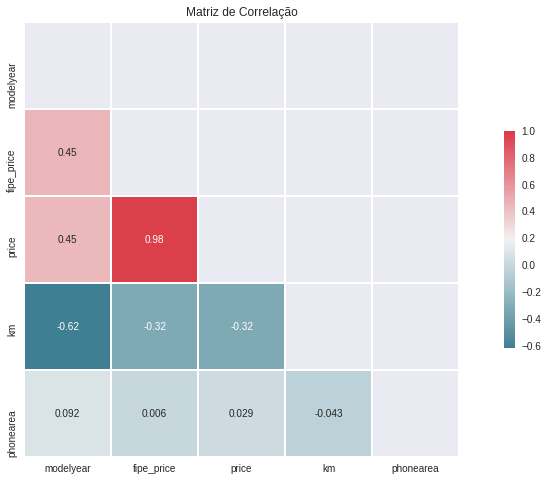

In [ ]:
#Matriz de correlação através de heatmap
fig, ax = plt.subplots(figsize = (16,8))
mask = np.zeros_like(data_f.corr(), dtype = np.bool)
mask[np.triu_indices_from(mask)] = True
cmap = sns.diverging_palette(220,10,as_cmap = True)
ax = sns.heatmap(data_f.corr(), cmap = cmap,mask = mask,  square = True, 
            linewidths = 0.5, cbar_kws = {'shrink': .5}, annot = True,
            vmax = 1)
plt.title('Matriz de Correlação')

In [ ]:
#Novas Informações dos tipos
data_f.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 327073 entries, 0 to 385855
Data columns (total 14 columns):
 #   Column      Non-Null Count   Dtype              
---  ------      --------------   -----              
 0   createdat   327073 non-null  datetime64[ns, UTC]
 1   make        327073 non-null  object             
 2   model       327073 non-null  object             
 3   modelyear   327073 non-null  int64              
 4   fipe_price  327073 non-null  float64            
 5   price       327073 non-null  float64            
 6   km          327073 non-null  float64            
 7   region      327073 non-null  object             
 8   phonearea   327073 non-null  int64              
 9   color       327073 non-null  object             
 10  engine      327073 non-null  object             
 11  bodystyle   327073 non-null  object             
 12  fuel        327073 non-null  object             
 13  cc_engine   327073 non-null  object             
dtypes: datetime64[ns, UT

Ainda é verificado o desbalanceamento de algumas variáveis caregóricas. As classes dessas features que possuem baixa representatividade foram removidas.

In [ ]:
#Remoção de algumas cc_engines
idx = data_f['cc_engine'].value_counts()[:25].index
data_f = data_f[data['cc_engine'].isin(idx)]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



In [ ]:
#Remoção da Única entrada de bodstyle == Coupê
data_f = data_f[data_f['bodystyle'] != 'Coupê']

Na feature Color, foram removidas as cores Roxo e Rosa por conterem um número muito pequeno de amostras. Já as cores Bronze, Dourado e Amarelo, foram reclassificadas para 'Amarelado', 

In [ ]:
#Remoção de cores com amostragem insignificante.
data_f = data_f[(data_f['color'] != 'Rosa') & (data_f['color'] != 'Roxo')]

In [ ]:
#Cores sendo agrupadas em uma categoria
data_f['color'].replace(['Bronze', 'Dourado', 'Amarelo'], 'Amarelado', inplace = True)

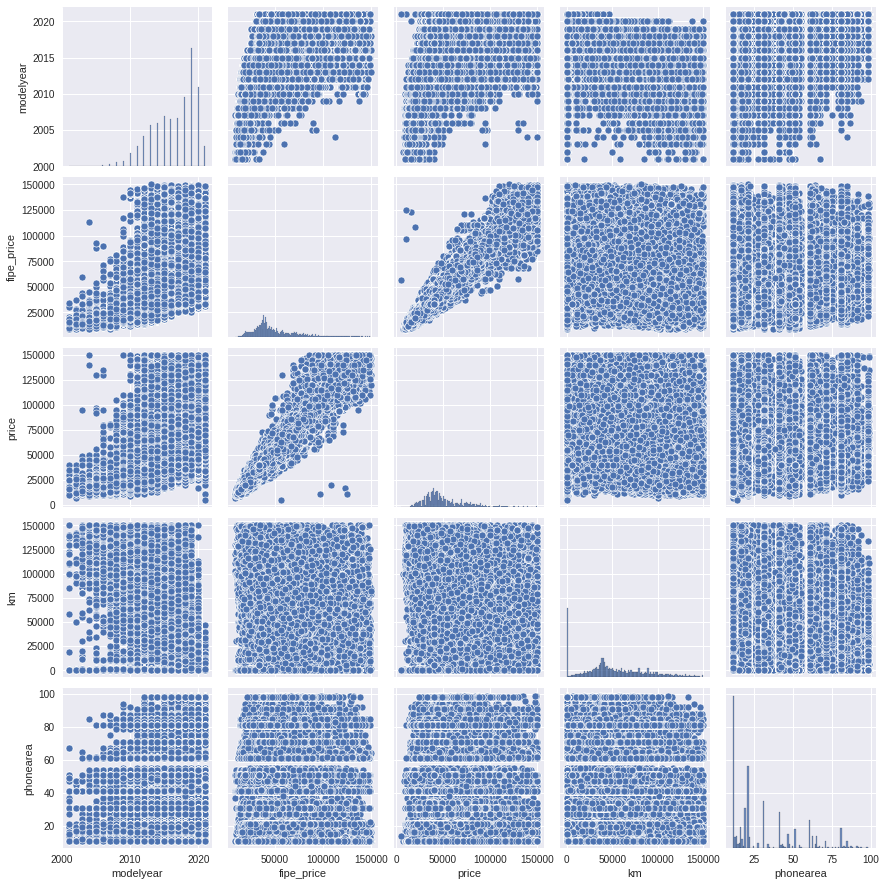

In [ ]:
#Scatter plot apos os dados filtrados.
sns.pairplot(data_f)



---



## Modelos e Experimentos<a name="models"></a>

Nesta etapa são realizados os treinamentos dos modelos sugeridos para resolver o problema. Inicialmente planeja-se utilizar o método Random Forest para prever os preços de novos veículos. Esse modelo é sugerido para o dado trabalho por ser um algorítmo de fácil utilização, onde os parâmetros padrão, fornecidos pelo sklearn, são suficientes para gerar uma primeiro resultado satisfaório e não há tempo hábil para realizar o processo de tunning.

Serão experimentados algumas variações com relação ao número de features utilizadas para o treinamento. O objetivo principal é verificar se é possível, nesta análise simplificada, estimar os valores dos veículos anúnciados sem a feature Fipe Price. Na sequência, no experimento 4, é treinado um modelo de rede neural.

O dataset é divido tem Train\Test com relação a 0.80\0.20. 

Pré-processamento: Com relação as variáveis categóricas, foi realizada o método de 'One Hot Encoder'.  Este processo binariza as variáveis categóricas. Outro fator foi a escalarização das featires através da padronização das variáveis.  

---



### Experimento 1

Para o primeiro experimento, foram removidas as seguintes features:

1.   'createdat': Para este caso, a feature de data foi desconsiderada;
2.   'model': Essa feature correlaciona com a feature 'make' e apesar de ser inicialmente mais interessante que a própria 'make,  apresenta muitas categorias e aumenta a complexidade do modelo;
3.   'phonearea': Considerada irrelevante para este caso, principalmente pela maioria dos dados ser da região de são paulo;
4.   'engine': Por apresentar muitas categorias diferente, essa feature foi retrabalhada e as informações principais foram extraídas e transformadas na feature 'cc_engine'.



In [ ]:
#Remoção de amostras inconclusivas
data_f = data_f[data_f['cc_engine'] != 'Não Fornecido']
data_f = data_f[data_f['color'] != 'Não Informada']

data_f.head()

createdat        make    model  ...  bodystyle  fuel  cc_engine
0 2020-10-01 00:04:06+00:00        Ford       Ka  ...      Hatch  Flex        1.5
1 2020-10-01 00:44:06+00:00     Hyundai     ix35  ...        SUV  Flex        2.0
2 2020-10-01 01:05:18+00:00  Volkswagen  Saveiro  ...    Picapes  Flex        1.6
3 2020-10-01 01:05:41+00:00   Chevrolet   Prisma  ...      Sedan  Flex        1.0
4 2020-10-01 01:08:43+00:00        Fiat      Uno  ...      Hatch  Flex        1.0

[5 rows x 14 columns]

In [ ]:
#Remoção das features
data_exp1 = data_f.drop(['createdat','model','phonearea', 'engine'], axis = 1)

In [ ]:
data_exp1.head()

make  modelyear  fipe_price    price  ...   color bodystyle  fuel cc_engine
0        Ford       2019     47482.0  49900.0  ...   Cinza     Hatch  Flex       1.5
1     Hyundai       2019     86978.0  89900.0  ...  Branco       SUV  Flex       2.0
2  Volkswagen       2014     32554.0  36900.0  ...  Branco   Picapes  Flex       1.6
3   Chevrolet       2013     31612.0  31900.0  ...  Branco     Sedan  Flex       1.0
4        Fiat       2015     28313.0  29890.0  ...  Branco     Hatch  Flex       1.0

[5 rows x 10 columns]

In [ ]:
#Separando as features no dataframe X da variável target em y ( Price)
X = data_exp1.drop('price',axis =1 )
y = data_exp1['price']

In [ ]:
# Para agilizar e reduzir erros humanos, foi criado um pipeline com as etapas de One hot encoder, e padronização dos dados.
pipe1 = Pipeline([
                 ('oneHot',OneHotEncoder()),
                 ('scaler', StandardScaler()),
                 ('model', RandomForestRegressor(n_estimators = 50))
])


In [ ]:
#Dividindo os dados em Train e test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state  = 41)

In [ ]:
# from sklearn.model_selection import cross_val_score, KFold
# cv = KFold(n_splits=5)
# scores = cross_val_score(pipe1, X_train, y_train, cv = cv)

In [ ]:
#Treinando o modelo Random Forest 
pipe1.fit(X_train,y_train)

/usr/local/lib/python3.7/dist-packages/category_encoders/utils.py:21: FutureWarning:

is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead



Pipeline(memory=None,
         steps=[('oneHot',
                 OneHotEncoder(cols=['make', 'region', 'color', 'bodystyle',
                                     'fuel', 'cc_engine'],
                               drop_invariant=False, handle_missing='value',
                               handle_unknown='value', return_df=True,
                               use_cat_names=False, verbose=0)),
                ('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('model',
                 RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                       criterion='mse', max_depth=None,
                                       max_features='auto', max_leaf_nodes=None,
                                       max_samples=None,
                                       min_impurity_decrease=0.0,
                                       min_impurity_split=None,
                                       min_samples_leaf=1, min_

In [ ]:
#Avaliando os dados de test
yhat = pipe1.predict(X_test)

In [ ]:
#Avaliando em métricas de desempenho.
#Mean Absolute Error - MAE
#Mean Squared Error - MSE
#Root Mean Squared Error - RMSE
#R-Squared - R2

MAE = mean_absolute_error(y_test,yhat)
MSE = mean_squared_error(y_test,yhat)
RMSE = np.sqrt(MSE)
R2 = explained_variance_score(y_test,yhat)
print(f'MAE: {MAE}\nMSE: {MSE}\nRMSE: {RMSE}\nR2: {R2}')

MAE: 1629.8763358654412
MSE: 9725890.17112602
RMSE: 3118.635947193263
R2: 0.9840882999651068


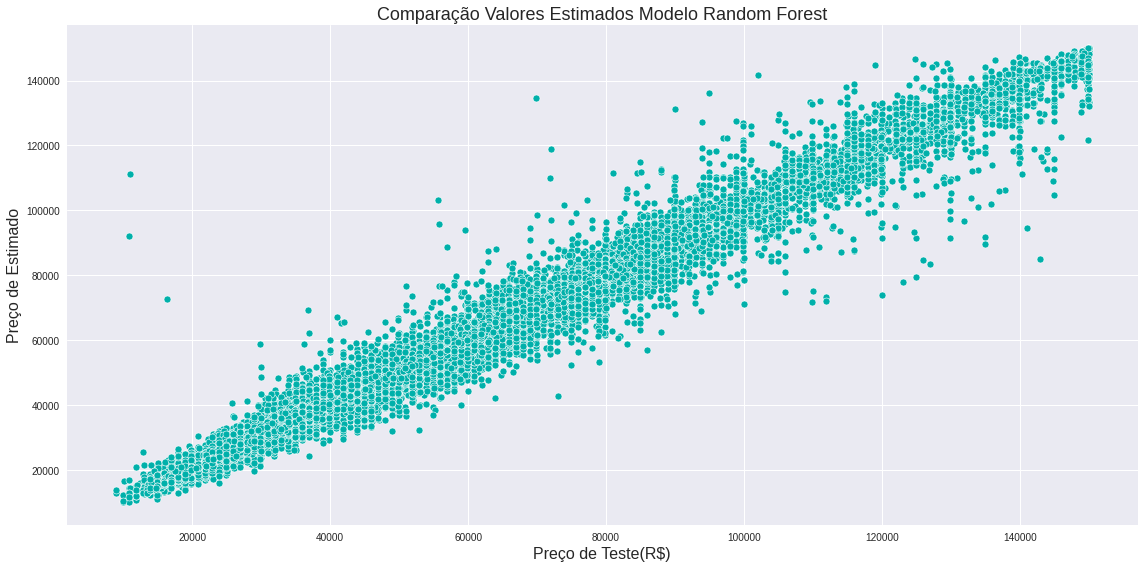

In [ ]:
#Plot valor estimado x valor teste
plt.figure(figsize = (16,8))
sns.scatterplot(x = y_test, y = yhat,color = '#00B0AA')
plt.ylabel('Preço de Estimado',fontdict = {'fontsize':16})
plt.xlabel('Preço de Teste(R$)',fontdict = {'fontsize':16})
plt.title('Comparação Valores Estimados Modelo Random Forest', fontdict = {'fontsize':18} )
plt.tight_layout()

### Experimento 2

Para este segundo experimento,além das features removidas anteriormente, foi removida a feature 'make', para simplificar o modelo e tentar estimar o valor sugerido do preço do veículo do anúncio sem a necessidade de informar a fabricante.

In [ ]:
#Extraindo as features
data_exp2 = data_f.drop(['createdat','make','model','phonearea', 'engine'], axis = 1)
X2 = data_exp2.drop('price',axis =1 )
y2 = data_exp2['price']
#Separando as features no dataframe X da variável target em y ( Price)
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size = 0.20, random_state  = 41)

In [ ]:
data_exp2.head()

modelyear  fipe_price    price        km  ...   color bodystyle  fuel cc_engine
0       2019     47482.0  49900.0   25241.0  ...   Cinza     Hatch  Flex       1.5
1       2019     86978.0  89900.0   23000.0  ...  Branco       SUV  Flex       2.0
2       2014     32554.0  36900.0   59650.0  ...  Branco   Picapes  Flex       1.6
3       2013     31612.0  31900.0  123570.0  ...  Branco     Sedan  Flex       1.0
4       2015     28313.0  29890.0   63111.0  ...  Branco     Hatch  Flex       1.0

[5 rows x 9 columns]

In [ ]:
# Para agilizar e reduzir erros humanos, foi criado um pipeline com as etapas de One hot encoder, e padronização dos dados.
pipe2 = Pipeline([
                 ('oneHot',OneHotEncoder()),
                 ('scaler', StandardScaler()),
                 ('model', RandomForestRegressor(n_estimators = 50))
])


In [ ]:
#Treinando o modelo Random Forest 
pipe2.fit(X_train2,y_train2)

/usr/local/lib/python3.7/dist-packages/category_encoders/utils.py:21: FutureWarning:

is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead



Pipeline(memory=None,
         steps=[('oneHot',
                 OneHotEncoder(cols=['region', 'color', 'bodystyle', 'fuel',
                                     'cc_engine'],
                               drop_invariant=False, handle_missing='value',
                               handle_unknown='value', return_df=True,
                               use_cat_names=False, verbose=0)),
                ('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('model',
                 RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                       criterion='mse', max_depth=None,
                                       max_features='auto', max_leaf_nodes=None,
                                       max_samples=None,
                                       min_impurity_decrease=0.0,
                                       min_impurity_split=None,
                                       min_samples_leaf=1, min_samples_

In [ ]:
#Avaliando os dados de test
yhat2 = pipe2.predict(X_test2)

In [ ]:
#Avaliando em métricas de desempenho.
#Mean Absolute Error - MAE
#Mean Squared Error - MSE
#Root Mean Squared Error - RMSE
#R-Squared - R2

MAE = mean_absolute_error(y_test2,yhat2)
MSE = mean_squared_error(y_test2,yhat2)
RMSE = np.sqrt(MSE)
R2 = explained_variance_score(y_test2,yhat2)
print(f'MAE: {MAE}\nMSE: {MSE}\nRMSE: {RMSE}\nR2: {R2}')

MAE: 1635.3680190065015
MSE: 9795823.624740167
RMSE: 3129.828050347202
R2: 0.9839739119234258


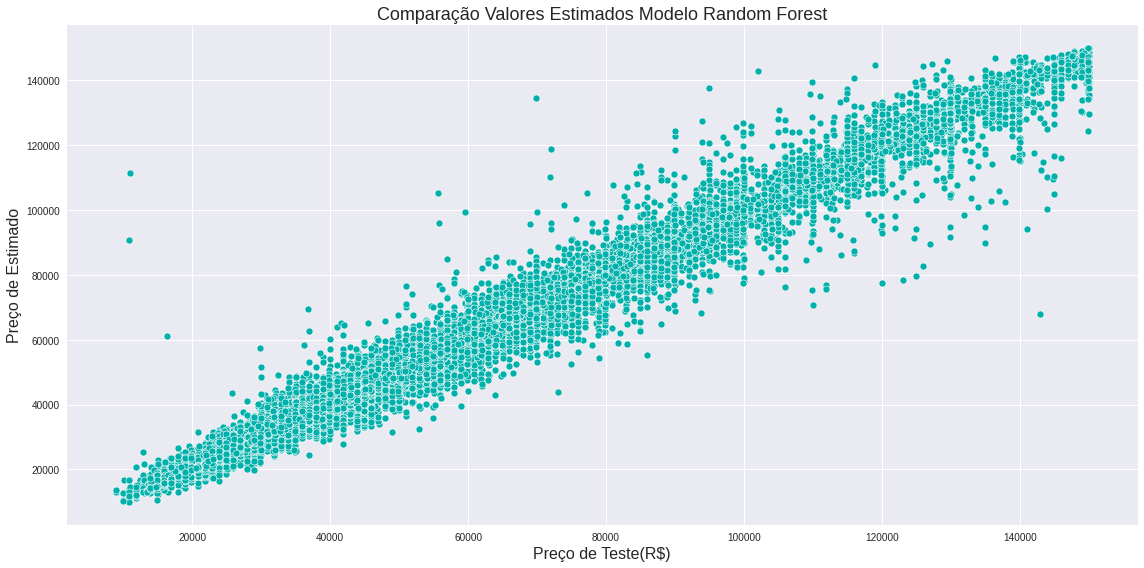

In [ ]:
#Plot valor estimado x valor teste
plt.figure(figsize = (16,8))
sns.scatterplot(x = y_test2, y = yhat2,color = '#00B0AA')
plt.ylabel('Preço de Estimado',fontdict = {'fontsize':16})
plt.xlabel('Preço de Teste(R$)',fontdict = {'fontsize':16})
plt.title('Comparação Valores Estimados Modelo Random Forest', fontdict = {'fontsize':18} )
plt.tight_layout()

### Experimento 3

Uma caracteristica importante, seria a capacidade de estimar o preço para o usúario sem a necessidade de obter informação do preço da tabela Fipe. Como foi verificada, possuí uma alta correlação com o  preço, já que é utilizada como base. Portanto, neste teste verifica-se a capacidade do modelo random forest de aprender sem essa feature também. 

Opta-se por realizar este teste pensando em estimar resultados independente da tabela fipe e visando mais os outros anúncios como base. Outro ponto, seria usar algo semelhante para estimar os valores de carros mais antigos que não não possuem os valores da tabela Fipe.

In [ ]:
#Extraindo as váriaveis, como no experimento 1 e 2 + a fipe_price
data_exp3 = data_f.drop(['createdat','fipe_price','make','model','phonearea', 'engine'], axis = 1)
X3 = data_exp3.drop('price',axis =1 )
y3 = data_exp3['price']
X_train3, X_test3, y_train3, y_test3 = train_test_split(X3, y3, test_size = 0.20, random_state  = 41)

In [ ]:
data_exp3.head()

modelyear    price        km region   color bodystyle  fuel cc_engine
0       2019  49900.0   25241.0     SP   Cinza     Hatch  Flex       1.5
1       2019  89900.0   23000.0     RJ  Branco       SUV  Flex       2.0
2       2014  36900.0   59650.0     PR  Branco   Picapes  Flex       1.6
3       2013  31900.0  123570.0     PR  Branco     Sedan  Flex       1.0
4       2015  29890.0   63111.0     RJ  Branco     Hatch  Flex       1.0

In [ ]:
#Pipeline de dados
pipe3 = Pipeline([
                 ('oneHot',OneHotEncoder()),
                 ('scaler', StandardScaler()),
                 ('model', RandomForestRegressor(n_estimators = 50))
])


In [ ]:
#Treinando o modelo Random Forest 
pipe3.fit(X_train3,y_train3)

/usr/local/lib/python3.7/dist-packages/category_encoders/utils.py:21: FutureWarning:

is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead



Pipeline(memory=None,
         steps=[('oneHot',
                 OneHotEncoder(cols=['region', 'color', 'bodystyle', 'fuel',
                                     'cc_engine'],
                               drop_invariant=False, handle_missing='value',
                               handle_unknown='value', return_df=True,
                               use_cat_names=False, verbose=0)),
                ('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('model',
                 RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                       criterion='mse', max_depth=None,
                                       max_features='auto', max_leaf_nodes=None,
                                       max_samples=None,
                                       min_impurity_decrease=0.0,
                                       min_impurity_split=None,
                                       min_samples_leaf=1, min_samples_

In [ ]:
 #Avaliando os dados de test
 yhat3 = pipe3.predict(X_test3)

In [ ]:
#Avaliando em métricas de desempenho.
#Mean Absolute Error - MAE
#Mean Squared Error - MSE
#Root Mean Squared Error - RMSE
#R-Squared - R2

MAE = mean_absolute_error(y_test3,yhat3)
MSE = mean_squared_error(y_test3,yhat3)
RMSE = np.sqrt(MSE)
R2 = explained_variance_score(y_test3,yhat3)
print(f'MAE: {MAE}\nMSE: {MSE}\nRMSE: {RMSE}\nR2: {R2}')

MAE: 3983.446504501646
MSE: 62017667.4323692
RMSE: 7875.12967717797
R2: 0.8985385963235281


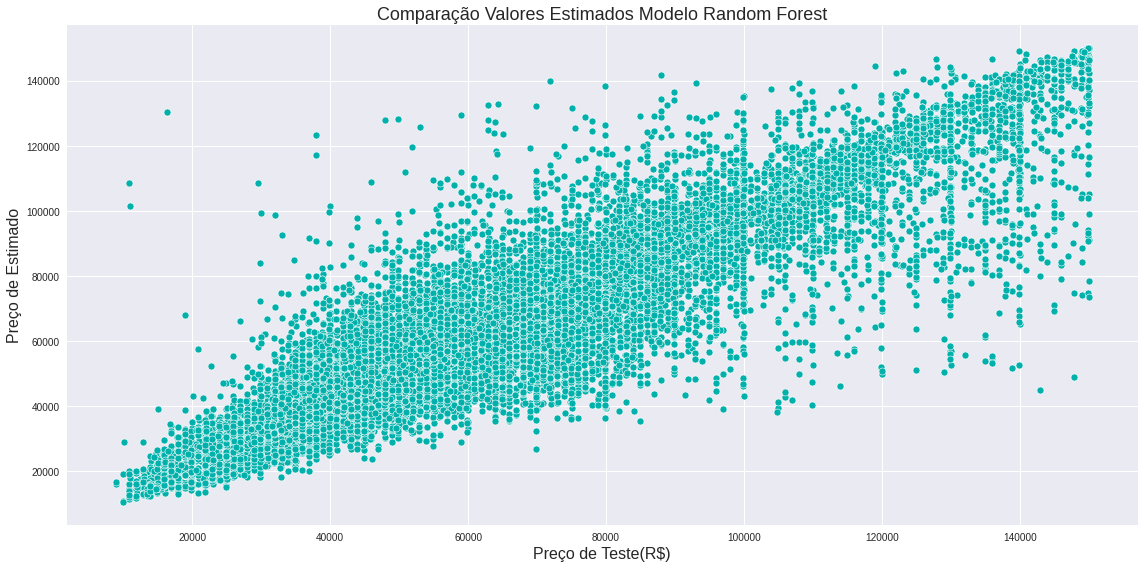

In [ ]:
#Gráfico valores extimado pelo valor de teste real
plt.figure(figsize = (16,8))
sns.scatterplot(x = y_test3, y = yhat3,color = '#00B0AA')
plt.ylabel('Preço de Estimado',fontdict = {'fontsize':16})
plt.xlabel('Preço de Teste(R$)',fontdict = {'fontsize':16})
plt.title('Comparação Valores Estimados Modelo Random Forest', fontdict = {'fontsize':18} )
plt.tight_layout()

### Experimento 4

Decidiu-se experimentar um rede neural profunda. As condições do dataset são as mesmas do experimento 3. Esse modelo requer um melhor estudo e principalmente mais tempo para realizar a configuração de seus parâmetros,  para gerar bons resultados. É apresentado aqui apenas como curiosidade.

Como não foi utilziado o pipeline, as etapas de pré-processamento foram realizadas na sequência com os dados de treino e teste.

In [ ]:
#One Hot encoder e padronização dados de treinamento
ohe = OneHotEncoder(use_cat_names=True)
X_train3 = ohe.fit_transform(X_train3)
scaler = StandardScaler().fit(X_train3)
X_train3 = scaler.transform(X_train3)

/usr/local/lib/python3.7/dist-packages/category_encoders/utils.py:21: FutureWarning:

is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead



In [ ]:
# One hot encoder e padronização dados de teste.
X_test3 = ohe.fit_transform(X_test3)
scaler_test = StandardScaler().fit(X_test3)
X_test3 = scaler_test.transform(X_test3)

/usr/local/lib/python3.7/dist-packages/category_encoders/utils.py:21: FutureWarning:

is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead



In [ ]:
#Verificando as dimensões dos dados de treinamento para entrar na rede
X_train3.shape

(257309, 77)

Foram experimentados algumas condifurações para a rede neural. Principal utilização foi de funções de ativação Relu. Batch size de 128 e variando as épocas de treinamento.

In [ ]:
#Criando o modelo e adicioando as camadas escondiads
model = Sequential()
model.add(Dense(X_train3.shape[1], activation = 'relu'))
model.add(Dense(77, activation = 'relu'))
model.add(Dense(20, activation = 'relu'))
model.add(Dense(20, activation = 'relu'))

model.add(Dense(1))

model.compile(optimizer = 'adam', loss = 'mse')

In [ ]:
#Após modelo estabelecido, é realizado o treinamento.
model.fit(x = X_train3, y = y_train3,batch_size=128, epochs=200)

In [ ]:
pred = model.predict(X_test3)

In [ ]:
#Avaliando em métricas de desempenho.
#Mean Absolute Error - MAE
#Mean Squared Error - MSE
#Root Mean Squared Error - RMSE
#R-Squared - R2

MAE = mean_absolute_error(y_test3,pred)
MSE = mean_squared_error(y_test3,pred)
RMSE = np.sqrt(MSE)
R2 = explained_variance_score(y_test3,pred)
print(f'MAE: {MAE}\nMSE: {MSE}\nRMSE: {RMSE}\nR2: {R2}')

MAE: 16566.389238779055
MSE: 553349216.5228801
RMSE: 23523.375959306522
R2: 0.13831667432058048


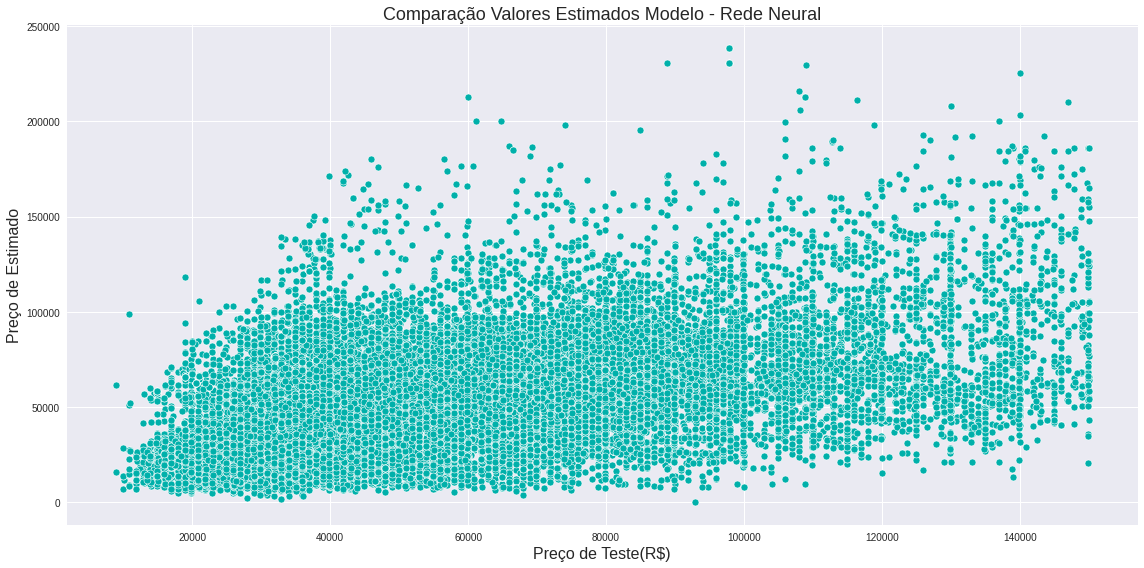

In [ ]:
#Gráfico valores extimado pelo valor de teste real
plt.figure(figsize = (16,8))
sns.scatterplot(x = y_test3, y = pred.flatten(),color = '#00B0AA')
plt.ylabel('Preço de Estimado',fontdict = {'fontsize':16})
plt.xlabel('Preço de Teste(R$)',fontdict = {'fontsize':16})
plt.title('Comparação Valores Estimados Modelo - Rede Neural', fontdict = {'fontsize':18} )
plt.tight_layout()

# Considerações Finais<a name="conclusion"></a>

Finalmente, após realizar o processo de análise dos dados de anúncios de veículos usados, foi possível identificar pontos interesantes para abordagem do problema de negócios.

Primeiramente, foram identificados os modelos e frabricantes de veículos mais anunciados, ficando claro o domínio de alguns modelos no mercado. As marcas com mais veículos são a Chevrolet, Fiat e Volksagen. Os véiculos com um grande número de anúncios são os modelos: Chevrolet Onix, Hyundai HB20 e Ford Ka. Como era esperado, os preços são, em média, muito próximos do valor tabelado Fipe.
O preço médio dos anúncios se encontra entre $R\$40.000,00$ a $R\$50.000,00$, porém há um número considerável de modelos nas faixas de $R\$80,000.00$ a $R\$100,000.00$. 

Outro fator curioso, é que o preço médio do veículo cai conforme o número de quilometros rodados aumenta, porém após o valor aproximado de $140.000$ Km o valor do veículo não parece ser mais influenciado pela quilometragem. 

A maioria dos anúncios é referente ao estado de São Paulo. Há poucas dados para outras regiões, principalmente diferente da sudeste

Veículos com motores $1.0$, $1.6$ e $2.0$ são os mais anúnciados, assim como as categorias Hatch e SUV com motor flex. Os Hatch apresentam os menores preços em média, diferente das SUV, que estão em terceiro com maior valor médio.

Foi verificado que existe um mercado de carros esportivos, porém com número menor de anúncios, um nicho. Outro ponto, é a existência um outro nicho com veículos antigos, que poderiam ser abordados utilizando método para sugeirir os preços, já que a tabela Fipe não os contempla.

Como esperava-se inicialmente, o preço anunciado teria uma alta correlação com o preço da Tabela Fipe e isso foi comprovado com uma correlação de Person de $0,98$. O ano do modelo também tem uma correlação positiva alta, com $0,45$. Já a quilometragem, como abordado anteriormente, apresenta uma alta correlação negativa com a caracteristica target.

Dos modelos experimentados, o experimento 2 apresenta bom desenpenho com $R^2$ igual a $0,98$ e RMSE de $3.141,81$. Diferentemente do experimento 1, que obteve valores semelhantes, este 
não possuí uma feature. O experimento 3, em que é descartado também o valor da tabela Fipe, apresenta  $R^2$ de $0,89$ e RMSE de $7.889,08$. Valor de erro apresentado é alto, porém serve como prova de conceito onde é possível estimar esses valores sem o preço da tabela Fipe como base.

O modelo proveniente do teste da rede neural não apresentou bons resultados para o mesmo caso apresentado no experimento 3, e acredita-se que foi devido ao ajuste dos parâmetros e definição do 
tamanho da rede de forma correta.
